In [58]:
# Core libraries for data analysis and visualization
# - pandas, numpy: data manipulation
# - matplotlib, seaborn: plotting and visualization
# - warnings: suppress benign warnings during exploratory analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [59]:
# Load the IPO dataset into a DataFrame for exploratory data analysis (EDA)
# Source file: 'IPO_Analysis.csv'
data_set = pd.read_csv('IPO_Analysis.csv')

In [60]:
# Quick summary of the dataset structure: columns, non-null counts and data types
# Useful to spot missing values and categorical vs numeric fields
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   COMPANY NAME                                            387 non-null    object 
 1   SECURITY TYPE                                           387 non-null    object 
 2   Symbol_x                                                387 non-null    object 
 3   ISSUE START DATE                                        387 non-null    object 
 4   ISSUE END DATE                                          387 non-null    object 
 5   Issue_price_Upper_Limit                                 387 non-null    int64  
 6   Issue_price_Lower_Limit                                 387 non-null    int64  
 7   ISSUE_Price_RANGE                                       387 non-null    int64  
 8   Listing Date                            

In [61]:
# Remove unnecessary or redundant columns to simplify EDA and later modeling
# These columns include text, duplicate symbols and listing price details not needed for % Gain / loss on Listing analysis
data_set.drop(columns=['SECURITY TYPE', 
                       'Symbol_x', 
                       'Opening Date', 
                       'Issue Price (Rs.)', 
                       'Open Price on Listing (Rs.)', 
                       'Close Price on Listing (Rs.)', 
                       'Market Cap on Close Price on Listing (Rs.cr.)', 
                       'Wealth creation w.r.t. Close Price on Listing (%)'], 
                       inplace= True)

In [62]:
# Convert date-like string columns to pandas datetime objects
# .str.upper() is used because some rows may have mixed case; ensures consistent parsing
data_set["ISSUE START DATE"] = pd.to_datetime(data_set["ISSUE START DATE"].str.upper())
data_set["ISSUE END DATE"] = pd.to_datetime(data_set["ISSUE END DATE"].str.upper())
data_set["Listing Date"] = pd.to_datetime(data_set["Listing Date"].str.upper())

In [63]:
# Show descriptive statistics for the target variable: '% Gain / loss on Listing' (GMP%)
# Rounded for readability
data_set['% Gain / loss on Listing'].describe().round(2)

count    387.00
mean      20.62
std       32.68
min      -35.12
25%       -1.33
50%       11.49
75%       32.67
max      171.11
Name: % Gain / loss on Listing, dtype: float64

## Analysis on % Gain/loss on Listing

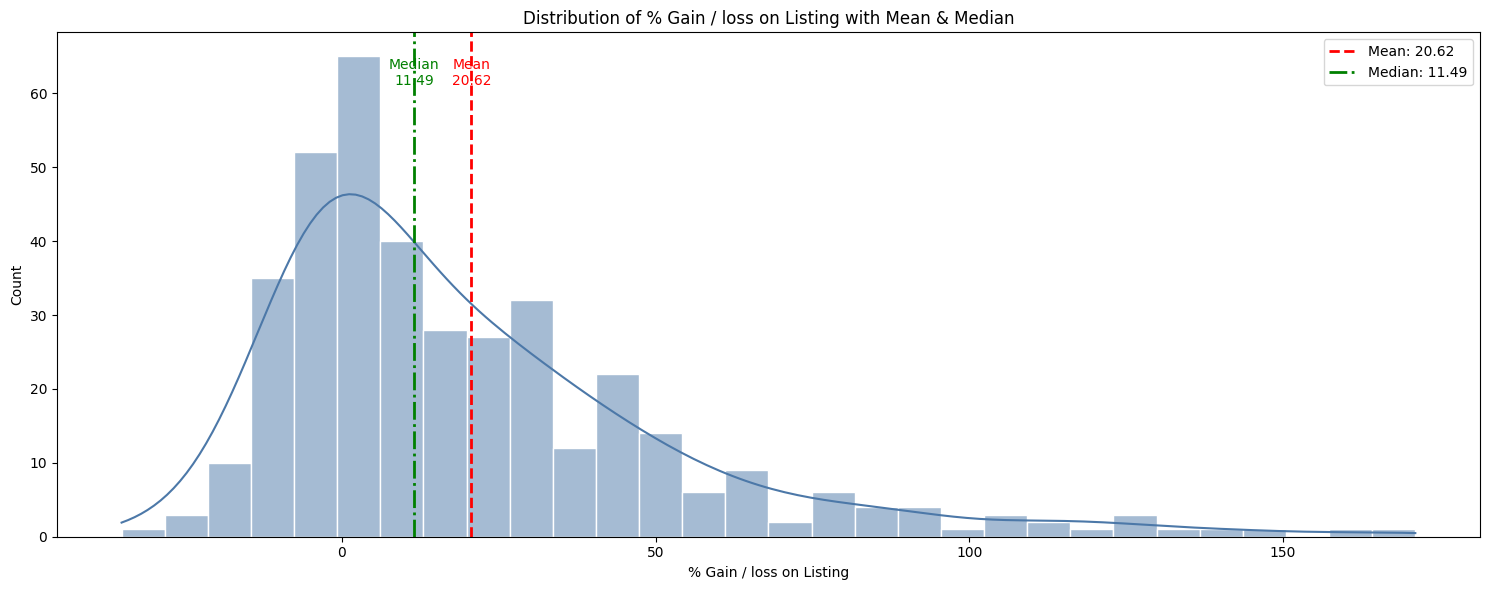

In [64]:
# Plot distribution of GMP% with mean & median highlighted
# - KDE to see distribution shape
# - Vertical lines and text show mean and median for quick reference
mean_val = data_set['% Gain / loss on Listing'].mean()
median_val = data_set['% Gain / loss on Listing'].median()

plt.figure(figsize=(15,6))
ax = sns.histplot(
    data=data_set,
    x = '% Gain / loss on Listing',
    kde = True,          
    bins = 30,           
    color = '#4C78A8',   
    edgecolor = 'white'
)

# Mark mean and median lines
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
ax.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')

ymax = ax.get_ylim()[1]
ax.text(mean_val, ymax*0.95, f'Mean\n{mean_val:.2f}', color='red', ha='center', va='top')
ax.text(median_val, ymax*0.95, f'Median\n{median_val:.2f}', color='green', ha='center', va='top')

# Styling
plt.title('Distribution of % Gain / loss on Listing with Mean & Median')
plt.xlabel('% Gain / loss on Listing')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()

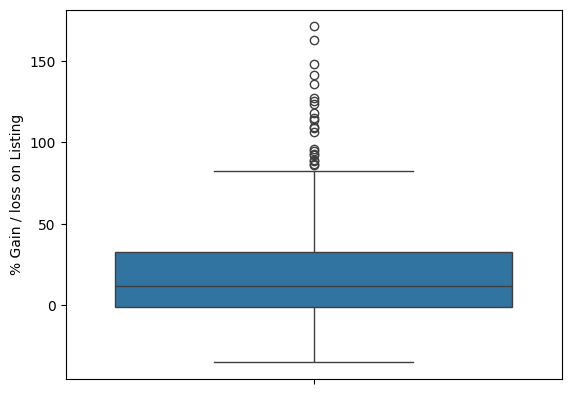

In [65]:
# Boxplot for the target variable to inspect spread and identify possible outliers
# Useful complement to the histogram above
sns.boxplot(data_set['% Gain / loss on Listing'])
plt.show()

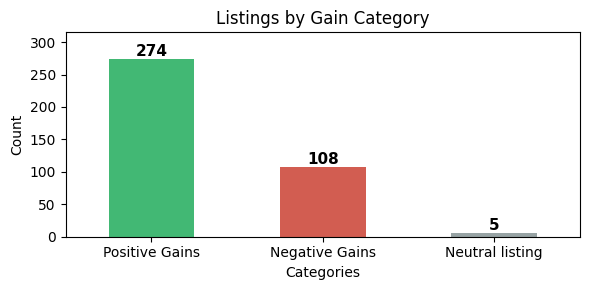

In [66]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

# Count IPOs by whether they gave positive, negative or neutral listing returns
positive_listing = data_set[data_set['% Gain / loss on Listing'] > 0].shape[0]
negative_listing = data_set[data_set['% Gain / loss on Listing'] < 0].shape[0]
zero_listing = data_set[data_set['% Gain / loss on Listing'] == 0].shape[0]

# Data for plotting
values = [positive_listing, negative_listing, zero_listing]
labels = ['Positive Gains', 'Negative Gains', 'Neutral listing']

plt.figure(figsize=(6, 3))
ax = sns.barplot(
    y=values,
    x=labels,
    width=0.5,
    palette=['#2ecc71', '#e74c3c', '#95a5a6']
)

# Add value labels on top of bars for clarity
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.0f}',                 # integer formatting
            ha='center', va='bottom',
            fontsize=11, color='black',
            fontweight='bold',
            clip_on=True
        )

# Add headroom so labels do not overlap the bar edge
ax.set_ylim(0, max(values) * 1.15)

plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Listings by Gain Category")
plt.tight_layout()
plt.show()

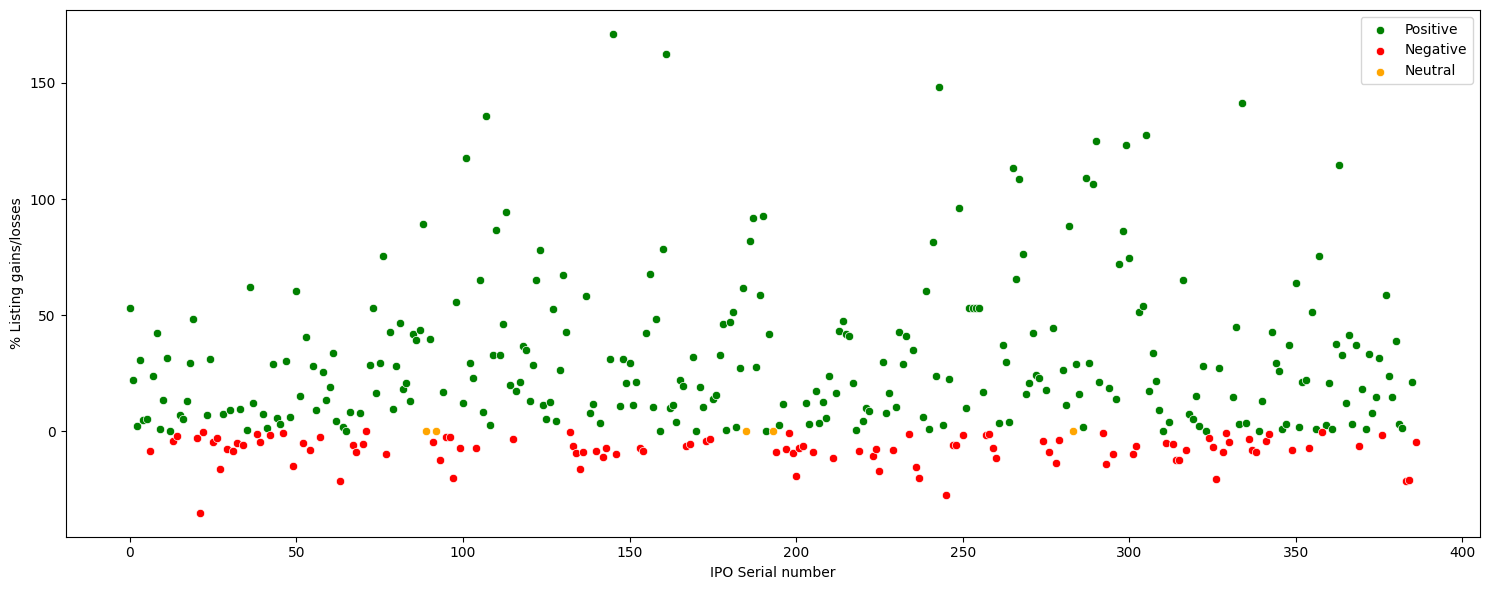

In [67]:
# Scatter plot of GMP% by IPO index, colored by sign (positive/negative/neutral)
# Helps visualize where positive vs negative results occur in the dataset order
plt.figure(figsize= (15,6) )

sns.scatterplot(  y = data_set[data_set['% Gain / loss on Listing'] > 0]['% Gain / loss on Listing'].values, x = data_set[data_set['% Gain / loss on Listing'] > 0]['% Gain / loss on Listing'].index, color = 'green' )
sns.scatterplot(  y = data_set[data_set['% Gain / loss on Listing'] < 0]['% Gain / loss on Listing'].values, x = data_set[data_set['% Gain / loss on Listing'] < 0]['% Gain / loss on Listing'].index, color = 'red')
sns.scatterplot(  y = data_set[data_set['% Gain / loss on Listing'] == 0]['% Gain / loss on Listing'].values, x = data_set[data_set['% Gain / loss on Listing'] == 0]['% Gain / loss on Listing'].index, color = 'orange')

plt.xlabel('IPO Serial number')
plt.ylabel('% Listing gains/losses')

plt.legend(['Positive', 'Negative', 'Neutral'])
plt.tight_layout()
plt.show()

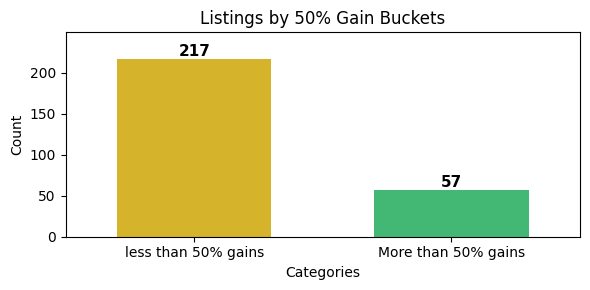

In [68]:
# Compare counts of IPOs with modest (<50%) gains vs big (>50%) gains
# Useful to quantify how common high listing pops are
Lessthan_50_gains = data_set[(data_set['% Gain / loss on Listing'] < 50) & (data_set['% Gain / loss on Listing'] > 0)]['% Gain / loss on Listing'].shape[0]
Morethan_50_gains = data_set[data_set['% Gain / loss on Listing'] > 50]['% Gain / loss on Listing'].shape[0]

import seaborn as sns
import matplotlib.pyplot as plt

labels = ['less than 50% gains', 'More than 50% gains']
values = [Lessthan_50_gains, Morethan_50_gains]

plt.figure(figsize=(6, 3))
ax = sns.barplot(
    x=labels,
    y=values,
    width=0.6,
    palette=['#f1c40f', '#2ecc71']  # yellow for <50%, green for >50%
)

# Annotate bar heights
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.0f}',
        ha='center', va='bottom',
        fontsize=11, color='black',
        fontweight='bold',
        clip_on=True
    )

# Headroom for labels
ax.set_ylim(0, max(values) * 1.15 if max(values) > 0 else 1)

plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Listings by 50% Gain Buckets")
plt.tight_layout()
plt.show()

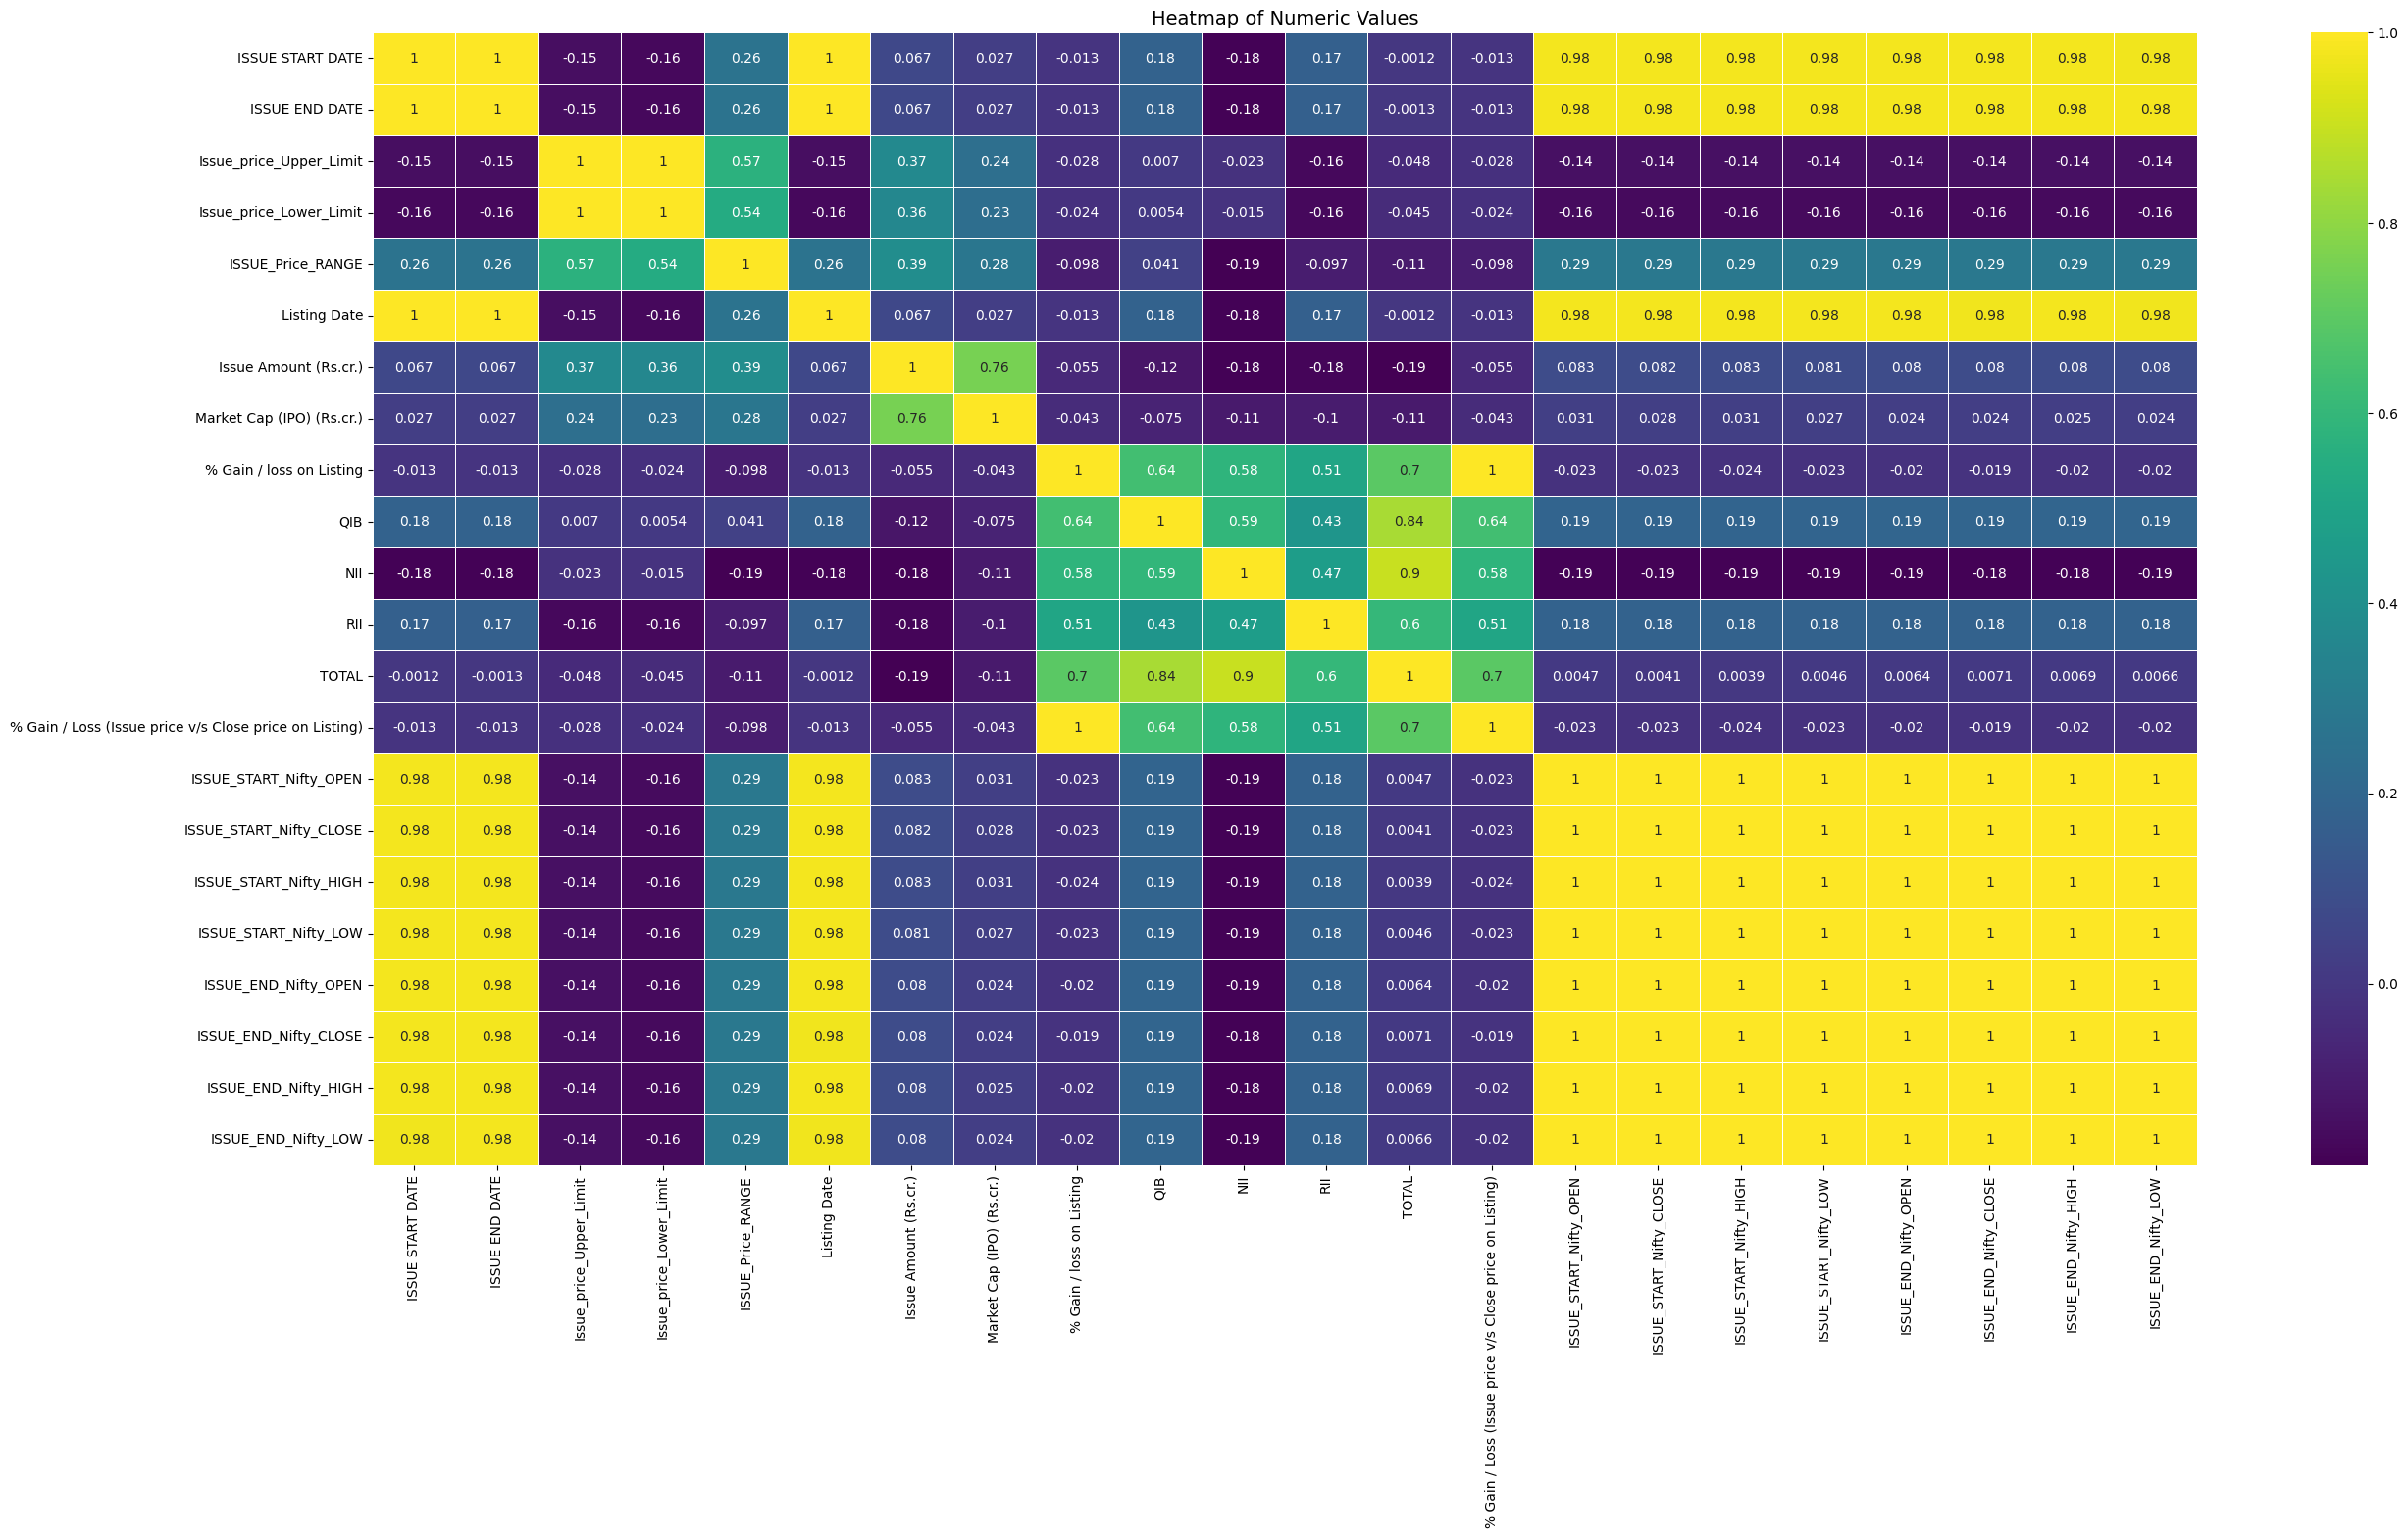

In [69]:
# Heatmap for correlation matrix of numeric columns
# - Quickly identifies highly correlated features that may be redundant
plt.figure(figsize=(30, 15))
sns.heatmap(
    data_set.select_dtypes(exclude = 'object').corr(),
    annot=True,          # shows the numeric values in each cell
    fmt=".2g",           # number formatting for annotations
    cmap="viridis",      # color palette
    linewidths=0.5,      # optional separation lines
    linecolor="white",
    cbar=True            # show color bar
)
plt.title("Heatmap of Numeric Values", fontsize=14)
#plt.tight_layout()
plt.show()

### Observations :

- Strong multicollinearity detected: Several numeric features show very high pairwise correlation (near ±1). This indicates redundancy and can cause unstable model coefficients if not addressed.

- Priority candidate features: Based on the correlation analysis, TOTAL subscription, Issue Amount (Rs.cr.), Issue price bounds (Upper/Lower Limit and Price Range), and market movement (NIFTY_CHANGE_PCT) are promising predictors to test first.

> Note: High correlation does not automatically mean a feature is unimportant — it may contain useful signal when combined, transformed, or used with appropriate regularization. Be conservative: test and document each removal or transformation.ully.

---

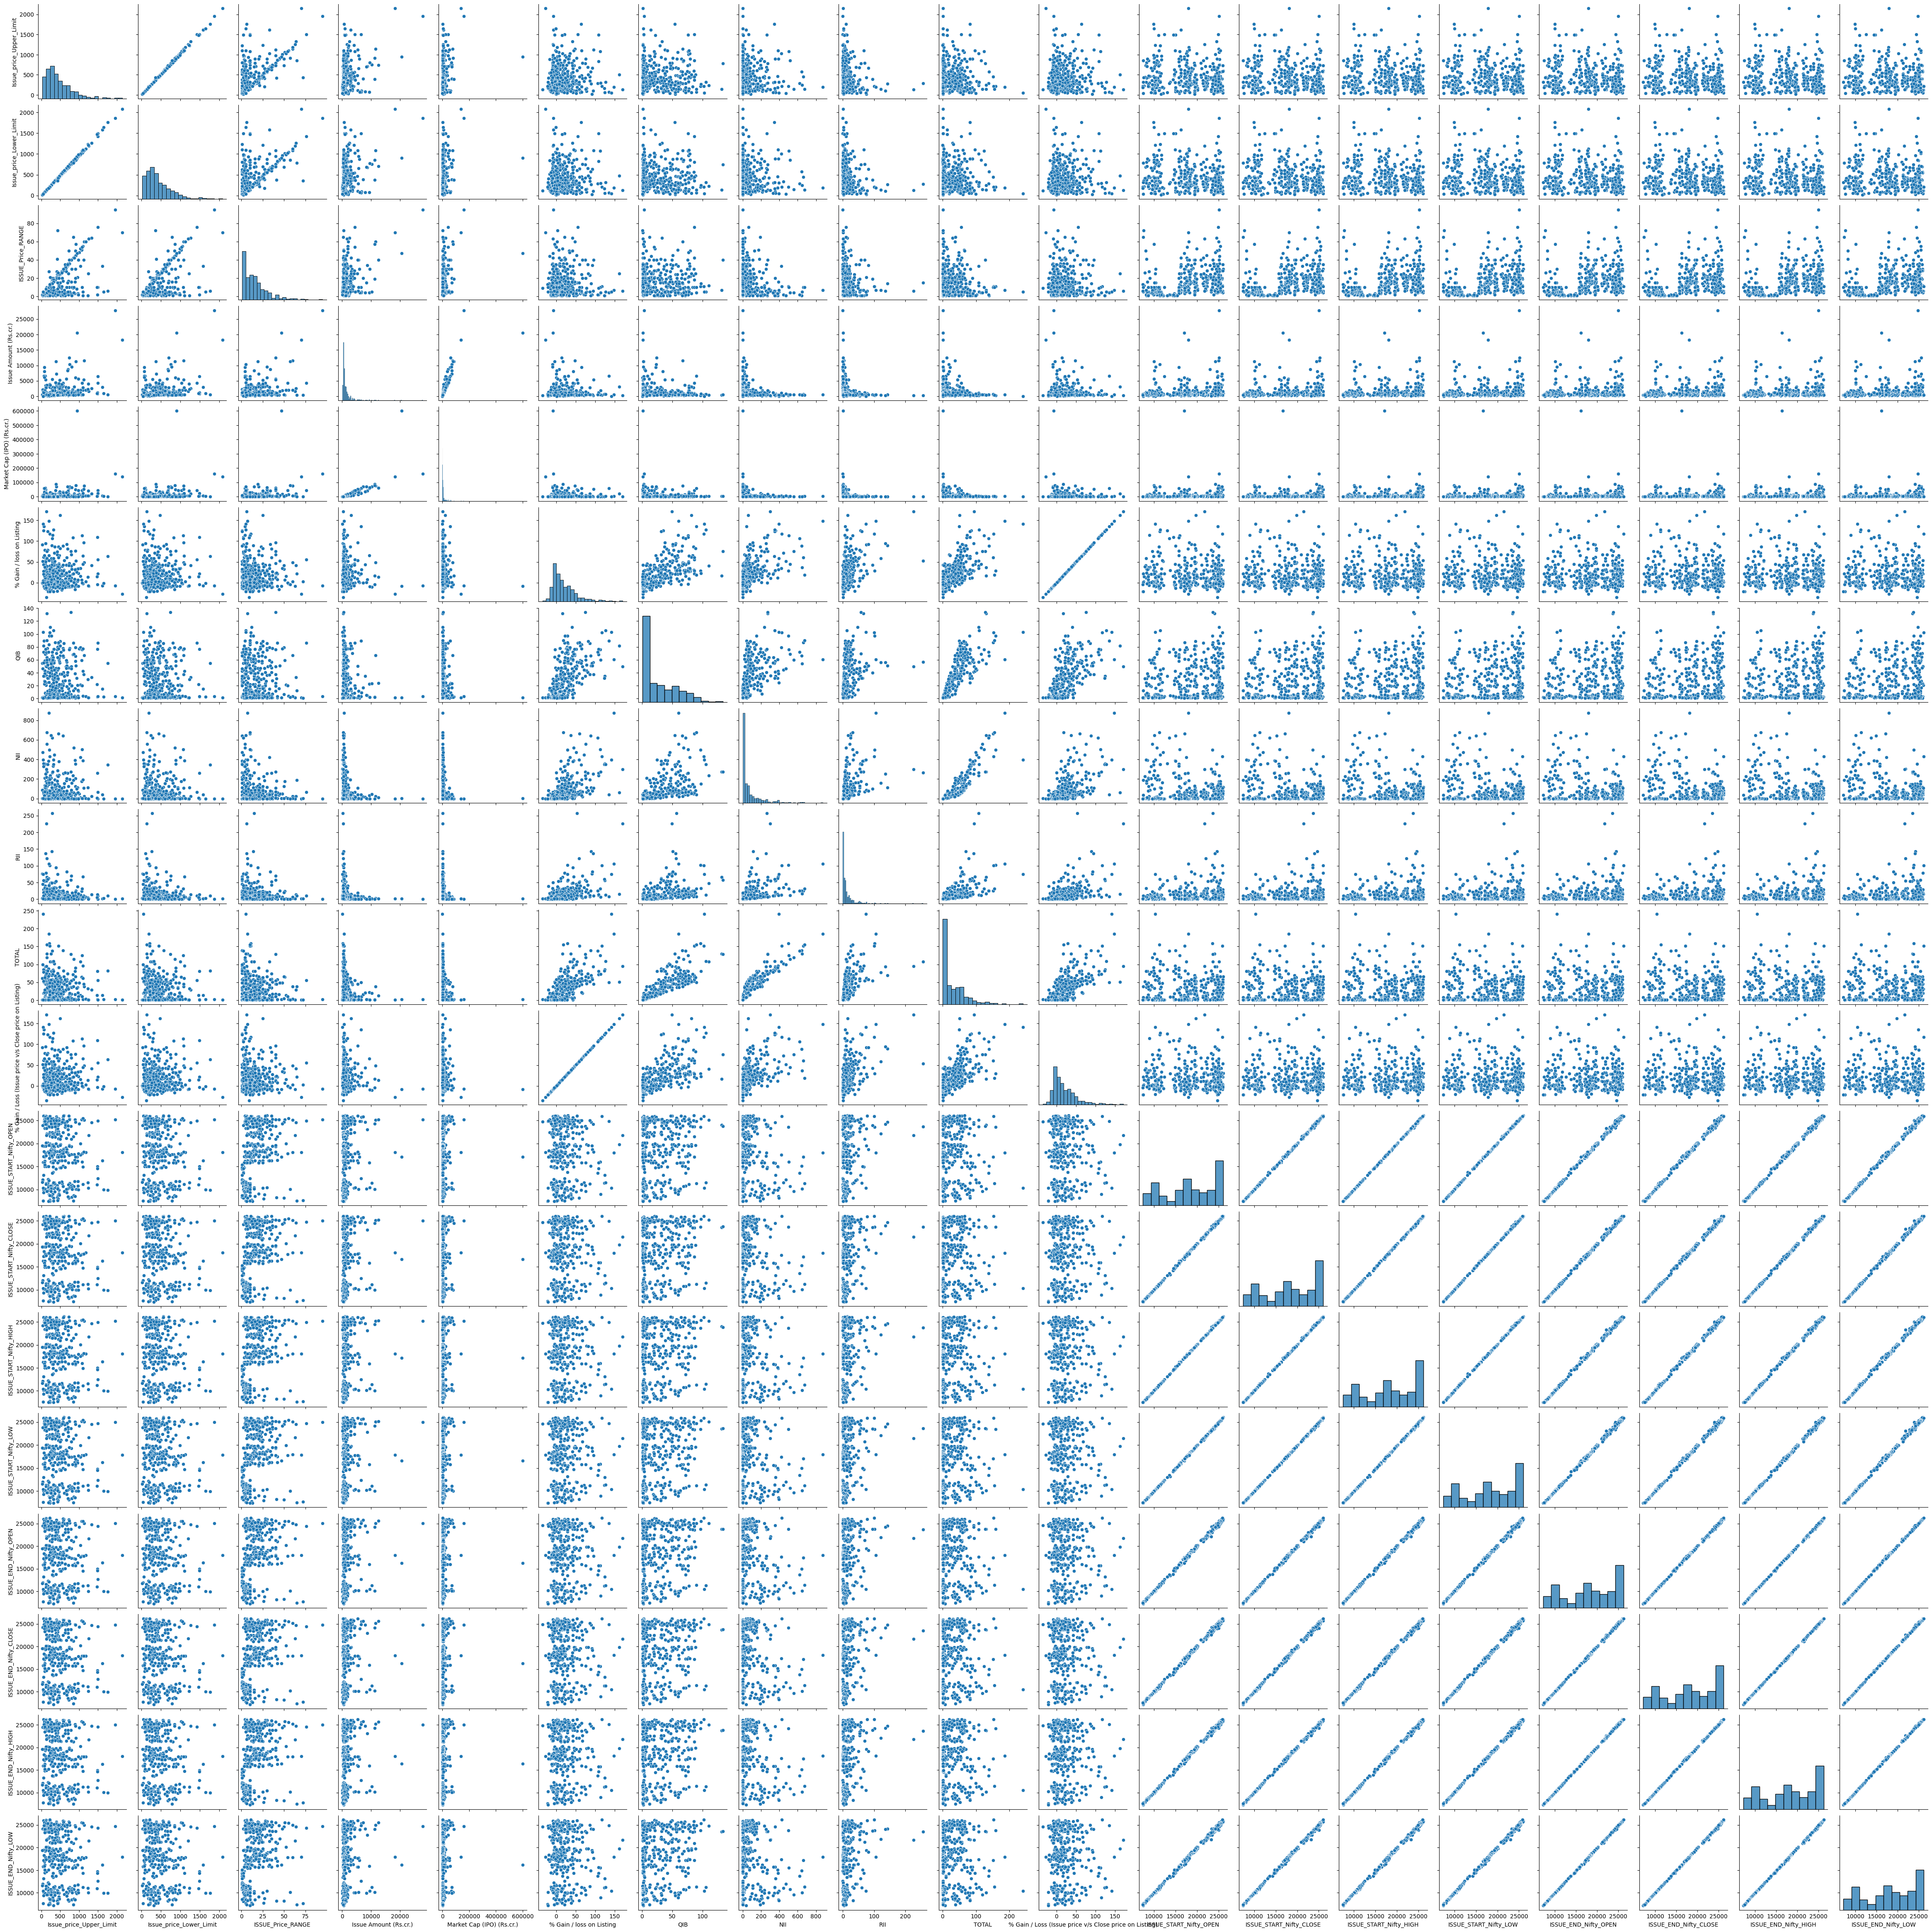

In [ ]:
# Pairplot commented out because it can be very slow on large datasets
# Uncomment for small samples or for deeper pairwise visual checks
sns.pairplot(data= data_set)
plt.show()

In [71]:
# Select numeric columns (exclude object and datetime) for further EDA and plotting
EDA_columns = data_set.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

# Display the selected numeric columns
EDA_columns

Index(['Issue_price_Upper_Limit', 'Issue_price_Lower_Limit',
       'ISSUE_Price_RANGE', 'Issue Amount (Rs.cr.)',
       'Market Cap (IPO) (Rs.cr.)', '% Gain / loss on Listing', 'QIB', 'NII',
       'RII', 'TOTAL',
       '% Gain / Loss (Issue price v/s Close price on Listing)',
       'ISSUE_START_Nifty_OPEN', 'ISSUE_START_Nifty_CLOSE',
       'ISSUE_START_Nifty_HIGH', 'ISSUE_START_Nifty_LOW',
       'ISSUE_END_Nifty_OPEN', 'ISSUE_END_Nifty_CLOSE', 'ISSUE_END_Nifty_HIGH',
       'ISSUE_END_Nifty_LOW'],
      dtype='object')

In [72]:
# Remove the target variable and a derived feature from the list used for predictor exploration
# We do not want to plot the target against itself
EDA_columns_no_tgt_var = EDA_columns.drop('% Gain / loss on Listing')
EDA_columns_no_tgt_var = EDA_columns_no_tgt_var.drop('% Gain / Loss (Issue price v/s Close price on Listing)')

In [ ]:
EDA_columns_no_tgt_var_list = EDA_columns_no_tgt_var.to_list()

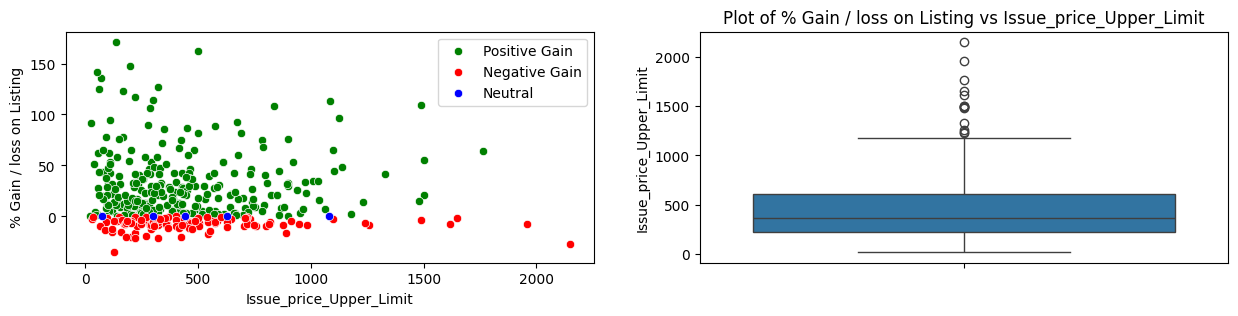

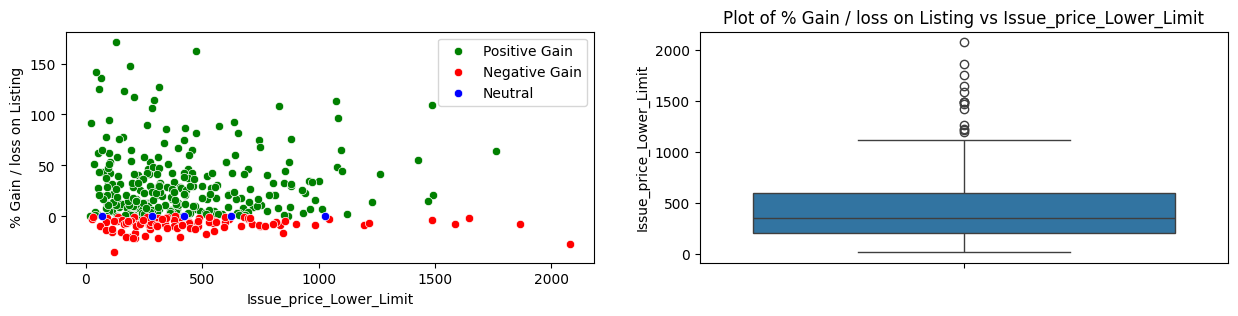

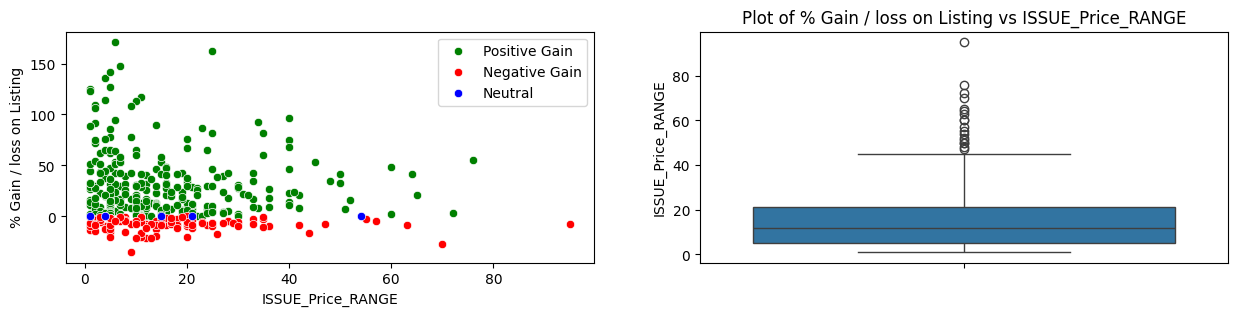

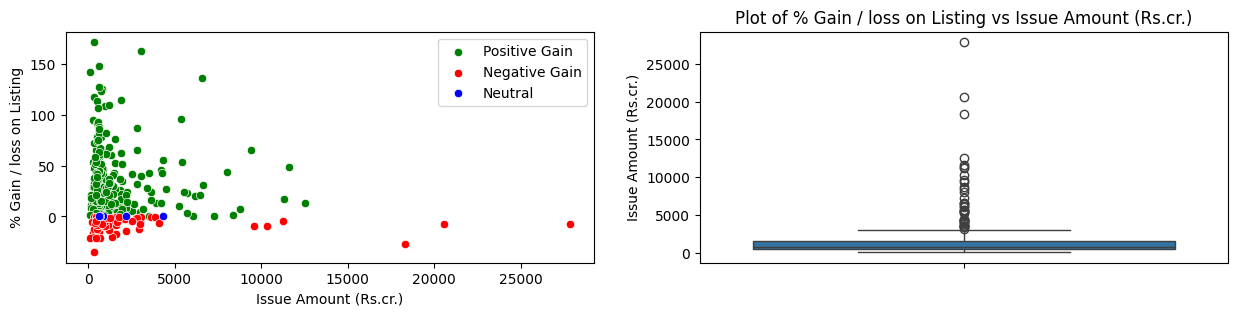

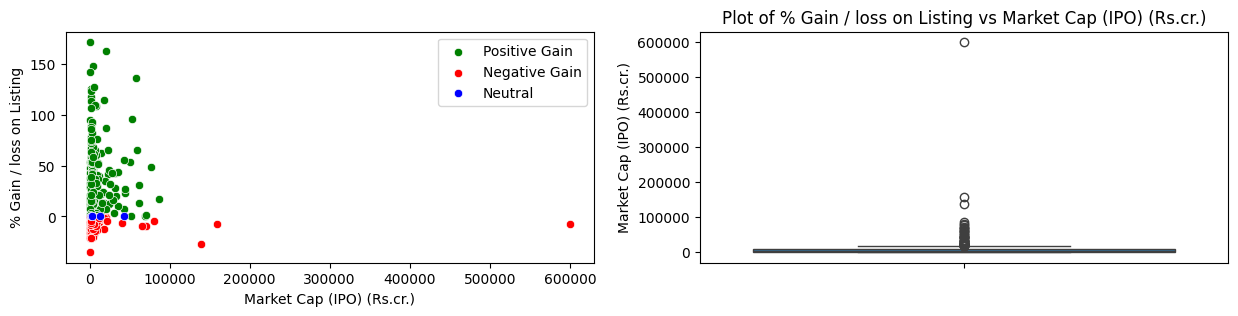

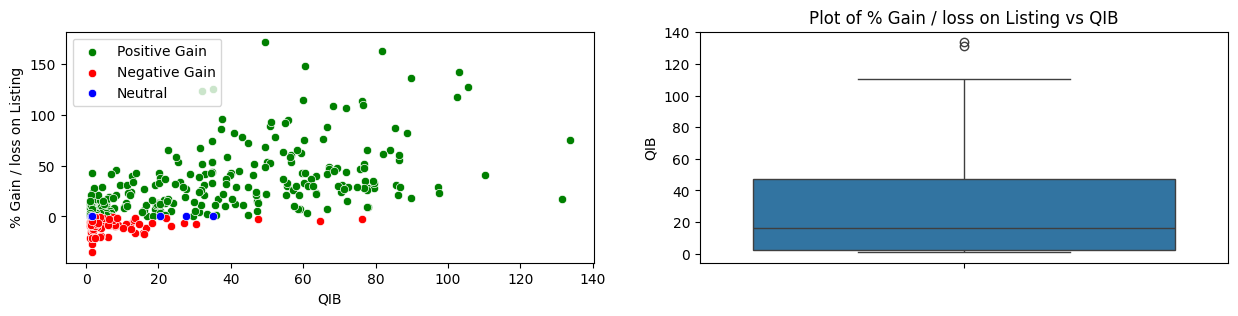

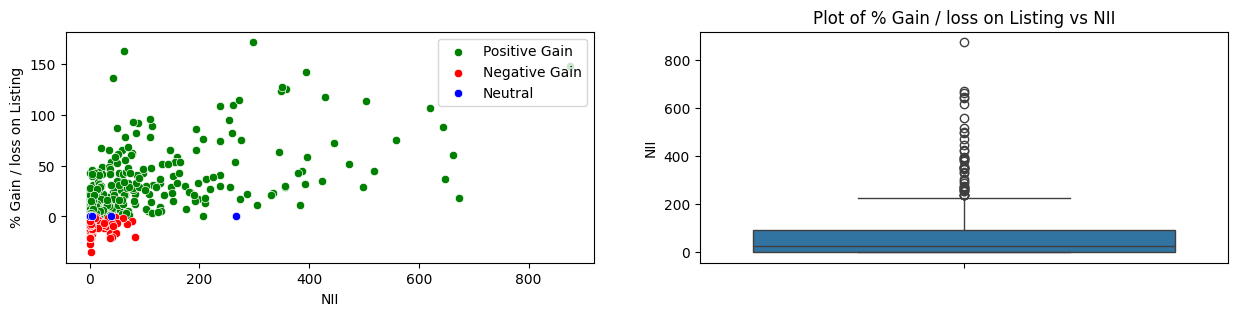

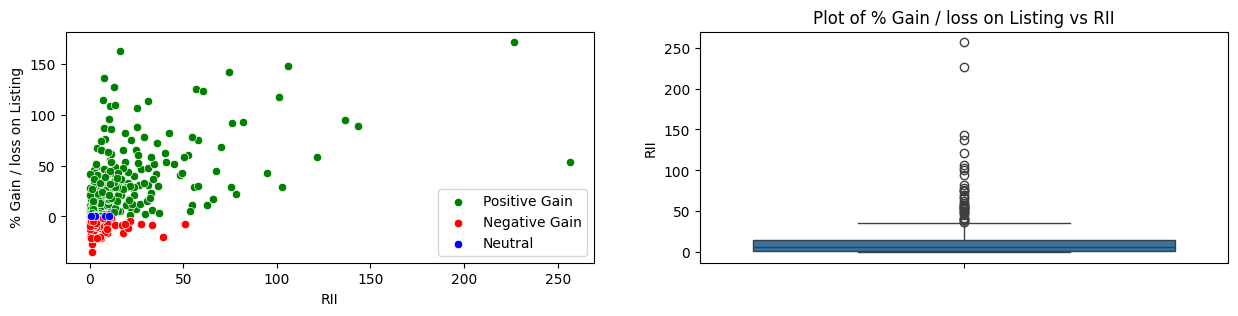

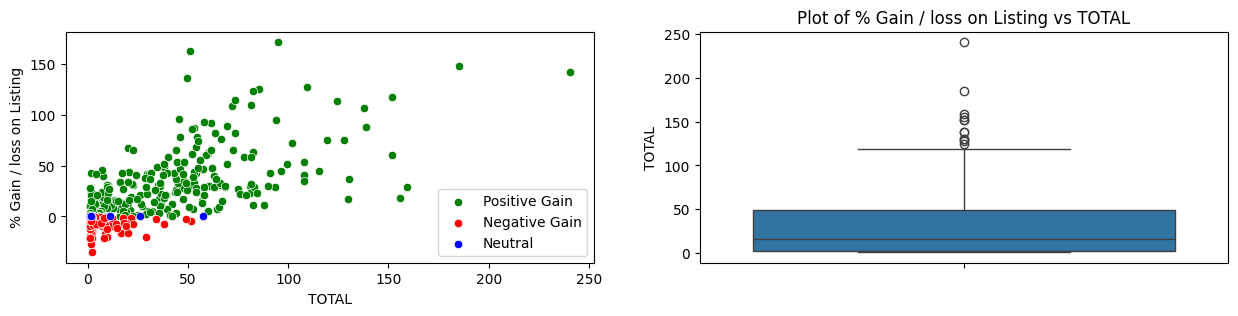

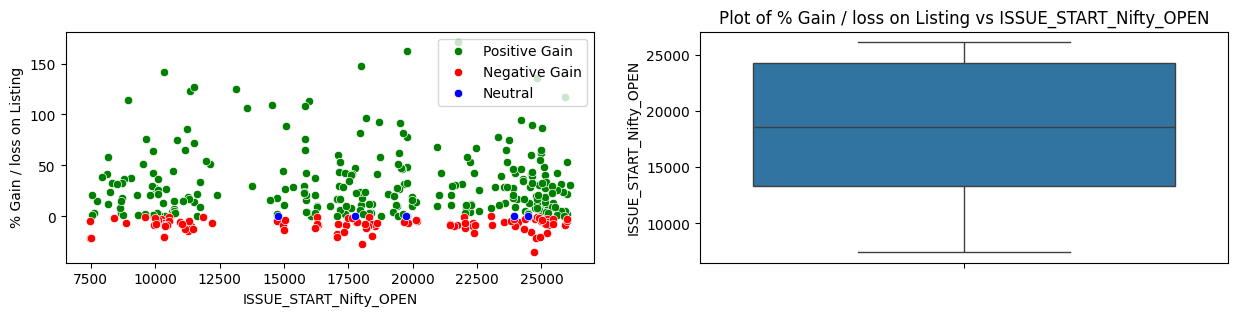

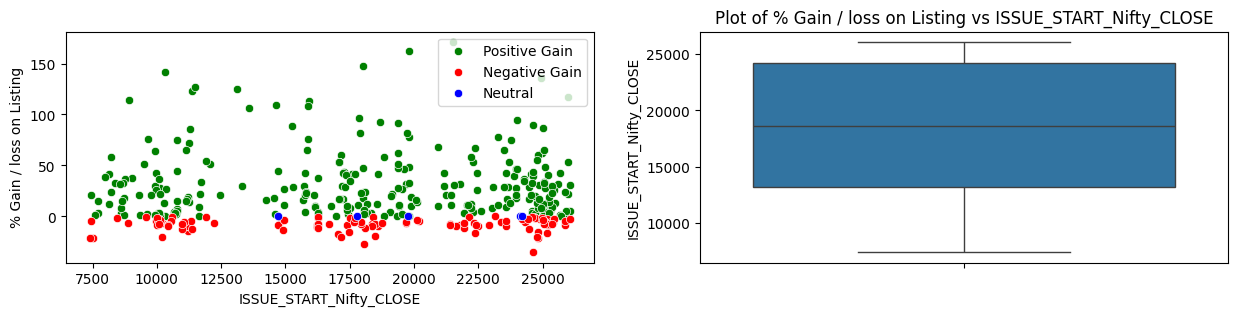

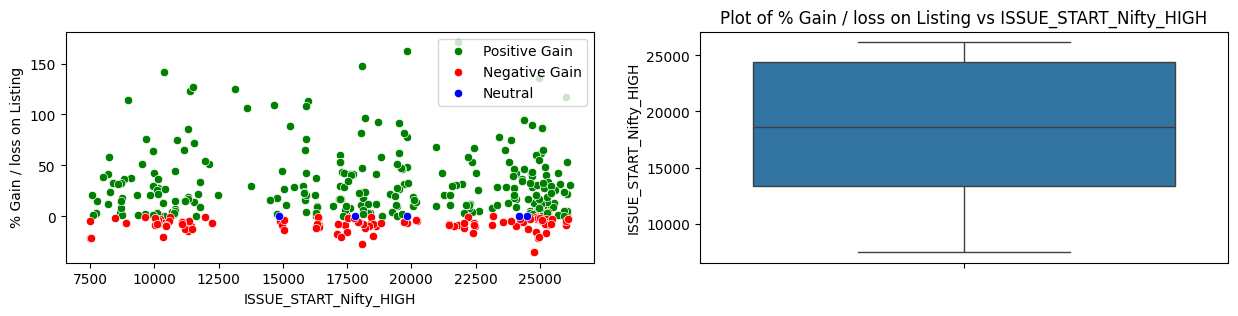

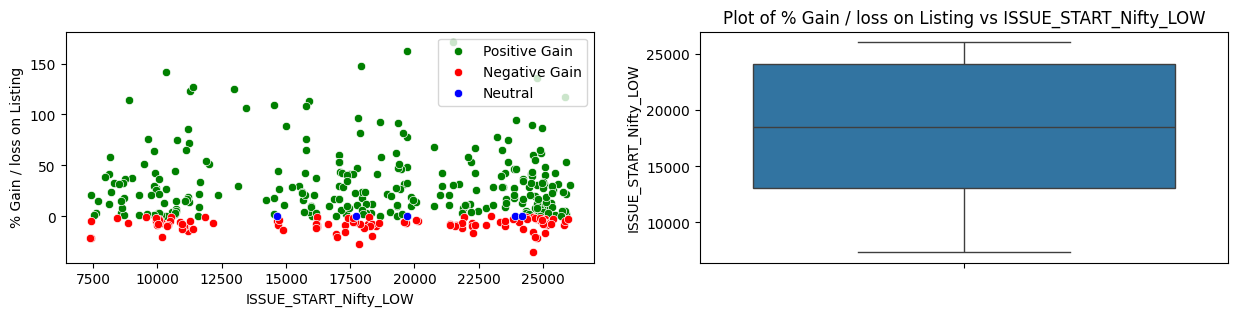

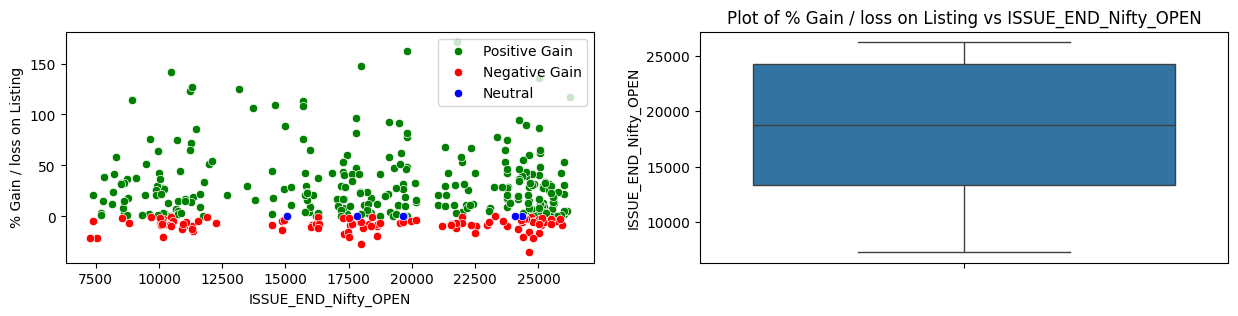

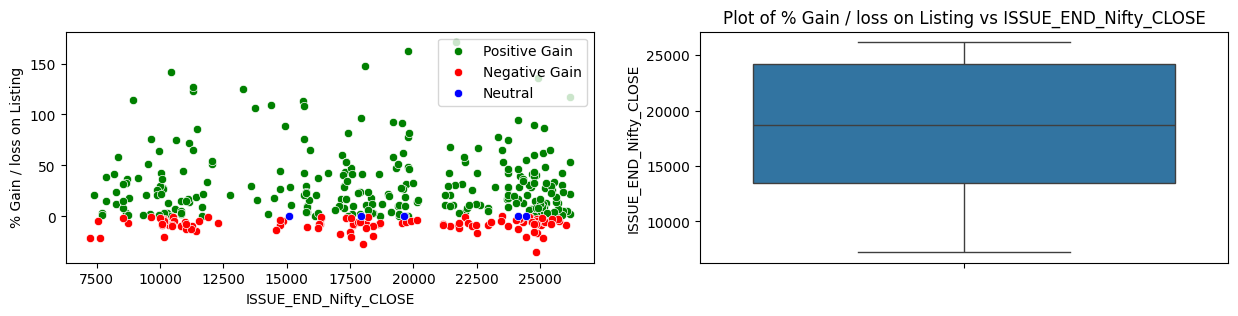

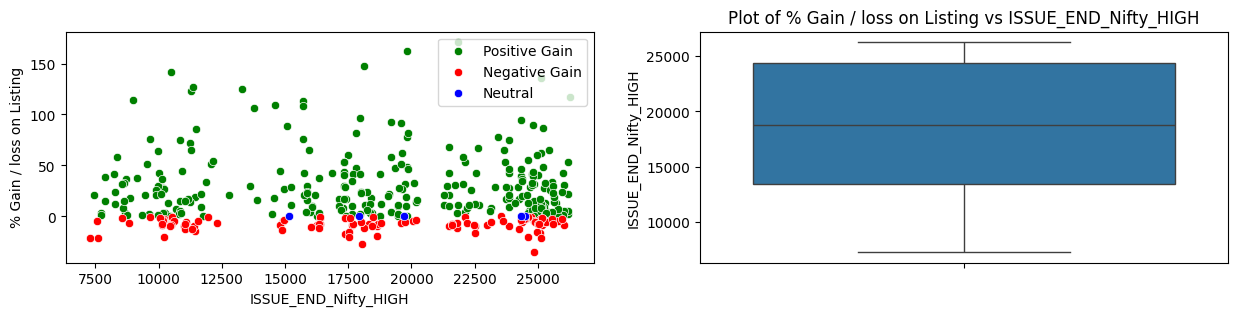

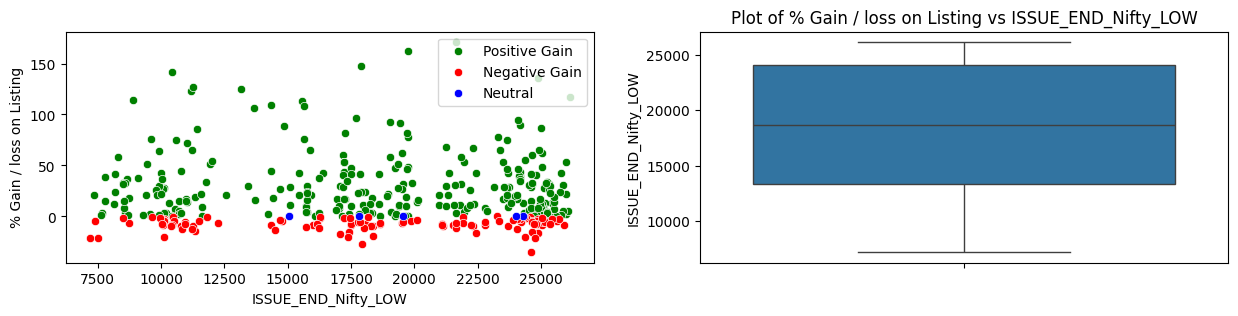

In [86]:
for i in EDA_columns_no_tgt_var_list:
    plt.figure(figsize= (15,3) )
    plt.subplot(1, 2, 1)
    sns.scatterplot( x = data_set[i], y = data_set[data_set['% Gain / loss on Listing'] > 0]['% Gain / loss on Listing'], color = 'green' )
    sns.scatterplot( x = data_set[i], y = data_set[data_set['% Gain / loss on Listing'] < 0]['% Gain / loss on Listing'], color = 'red' )
    sns.scatterplot( x = data_set[i], y = data_set[data_set['% Gain / loss on Listing'] == 0]['% Gain / loss on Listing'], color = 'blue' )
    plt.xlabel(i)
    plt.ylabel('% Gain / loss on Listing')
    plt.legend(['Positive Gain', 'Negative Gain', 'Neutral'])

    plt.subplot(1, 2, 2)
    sns.boxplot( data= data_set, y = i )
    plt.ylabel(i)
    plt.title(f'Plot of % Gain / loss on Listing vs {i}')
    plt.show()

## Strategic Observations & Insights
1. Valuation & Pricing Risk (The "Saturation" Threshold)
- Premium Pricing Ceiling: Identified that high-ticket IPOs (Price Bands near ₹2,000) often face listing pressure, indicating a potential saturation point for immediate retail gains.

- Price Spread Sensitivity: Discovered that wide price bands (spreads > ₹80) correlate with negative listing performance, suggesting that aggressive pricing discovery can lead to market pushback on listing day.


2. Scale & Market Capitalization Impact
- The "Large-Cap" Burden: Quantified a trend where "Mega-IPOs" with Issue Amounts exceeding ₹15,000 CR or Market Capitalizations above ₹1 Lakh CR are more susceptible to negative listing gains, likely due to the massive liquidity required to drive price appreciation.


3. Demand-Driven Success Metrics (Subscription Benchmarking)
- Institutional Momentum (QIB): Established that a QIB subscription threshold of >80x is a high-confidence predictor of positive listing gains, reflecting strong smart-money backing.

- High-Net-Worth Participation (NII): Identified NII subscription levels above 100x as a key indicator for positive to neutral listings, serving as a proxy for leveraged market interest.

- Retail Sentiment (RII): Validated that Retail subscription exceeding 50x serves as a robust "safety floor," consistently correlating with positive investor exits on the first day of trading.

---

SECTION 1: TARGET VARIABLE DISTRIBUTION (GMP%)

1.1 — GMP% Statistics:
count    387.000000
mean      20.622739
std       32.676709
min      -35.120000
25%       -1.330000
50%       11.490000
75%       32.670000
max      171.110000
Name: % Gain / loss on Listing, dtype: float64

1.2 — Additional Stats:
Skewness: 1.687
Kurtosis: 3.463
Min: -35.12%
Max: 171.11%
Median: 11.49%

1.3 — IPO Count by GMP Category:
GMP_Category
Loss      113
0-10%      72
10-20%     50
20-50%     95
>50%       57
Name: count, dtype: int64


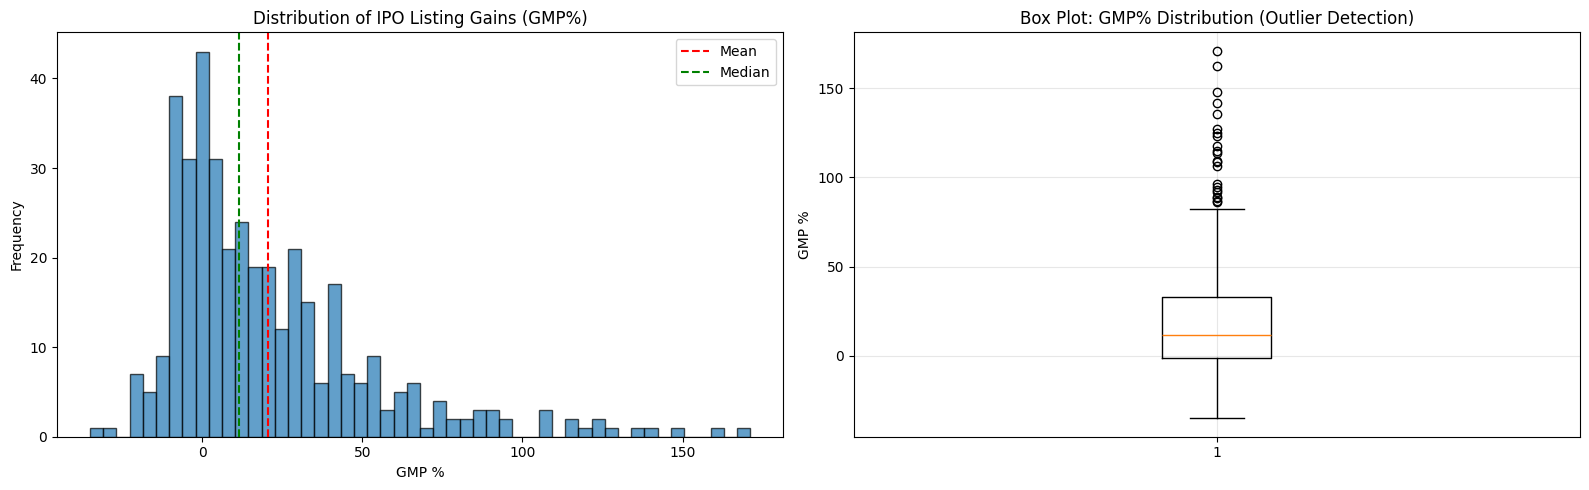


1.4 — Outlier Count: 22 IPOs
Top 5 Highest GMP IPOs:
                   COMPANY NAME  % Gain / loss on Listing
145             BLS E- SERVICES                    171.11
161           TATA TECHNOLOGIES                    162.60
243       LATENT VIEW ANALYTICS                    148.10
334  ASTRON PAPER & BOARD MILLS                    141.50
107       BAJAJ HOUSING FINANCE                    135.71

Top 5 Lowest GMP IPOs:
                      COMPANY NAME  % Gain / loss on Listing
21                         GLOTTIS                    -35.12
245          ONE 97 COMMUNICATIONS                    -27.40
383  HEALTHCARE GLOBAL ENTERPRISES                    -21.56
63             ARISINFRA SOLUTIONS                    -21.45
384        QUICK HEAL TECHNOLOGIES                    -20.92


In [76]:
## **SECTION 1: TARGET VARIABLE ANALYSIS (% Gain / loss on Listing = GMP%)**

# Section header prints and initial descriptive stats for the target
print("=" * 80)
print("SECTION 1: TARGET VARIABLE DISTRIBUTION (GMP%)")
print("=" * 80)

# Basic statistics
print("\n1.1 — GMP% Statistics:")
print(data_set['% Gain / loss on Listing'].describe())

print("\n1.2 — Additional Stats:")
print(f"Skewness: {data_set['% Gain / loss on Listing'].skew():.3f}")
print(f"Kurtosis: {data_set['% Gain / loss on Listing'].kurtosis():.3f}")
print(f"Min: {data_set['% Gain / loss on Listing'].min():.2f}%")
print(f"Max: {data_set['% Gain / loss on Listing'].max():.2f}%")
print(f"Median: {data_set['% Gain / loss on Listing'].median():.2f}%")

# Categorize GMP into bins to make counts and proportions more interpretable
print("\n1.3 — IPO Count by GMP Category:")
data_set['GMP_Category'] = pd.cut(data_set['% Gain / loss on Listing'], 
                             bins=[-np.inf, 0, 10, 20, 50, np.inf],
                             labels=['Loss', '0-10%', '10-20%', '20-50%', '>50%'])
print(data_set['GMP_Category'].value_counts().sort_index())

# Visualization: Histogram + KDE with mean/median lines (repeat of earlier visual but grouped in section)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].hist(data_set['% Gain / loss on Listing'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('GMP %')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of IPO Listing Gains (GMP%)')
axes[0].axvline(data_set['% Gain / loss on Listing'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(data_set['% Gain / loss on Listing'].median(), color='green', linestyle='--', label='Median')
axes[0].legend()

# Box plot for outlier detection
axes[1].boxplot(data_set['% Gain / loss on Listing'], vert=True)
axes[1].set_ylabel('GMP %')
axes[1].set_title('Box Plot: GMP% Distribution (Outlier Detection)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Outlier analysis using IQR rule
Q1 = data_set['% Gain / loss on Listing'].quantile(0.25)
Q3 = data_set['% Gain / loss on Listing'].quantile(0.75)
IQR = Q3 - Q1
outliers_mask = (data_set['% Gain / loss on Listing'] < Q1 - 1.5*IQR) | (data_set['% Gain / loss on Listing'] > Q3 + 1.5*IQR)
print(f"\n1.4 — Outlier Count: {outliers_mask.sum()} IPOs")
print("Top 5 Highest GMP IPOs:")
print(data_set.nlargest(5, '% Gain / loss on Listing')[['COMPANY NAME', '% Gain / loss on Listing']])
print("\nTop 5 Lowest GMP IPOs:")
print(data_set.nsmallest(5, '% Gain / loss on Listing')[['COMPANY NAME', '% Gain / loss on Listing']])


SECTION 2: IPO PERFORMANCE TRENDS OVER TIME

2.1 — Yearly IPO Statistics:
      count       mean  median        std
Year                                     
2016     22  13.964091  13.560  20.498803
2017     31  22.618387   3.370  35.947600
2018     21   6.191429   0.060  20.631970
2019     11  27.957273  17.270  39.039030
2020     14  45.447857  25.310  50.873108
2021     58  27.915000  19.200  37.785321
2022     34   7.510882   5.170  17.886933
2023     47  27.115957  19.100  34.416371
2024     74  27.205405  18.995  36.338948
2025     75   9.822800   5.110  19.026050


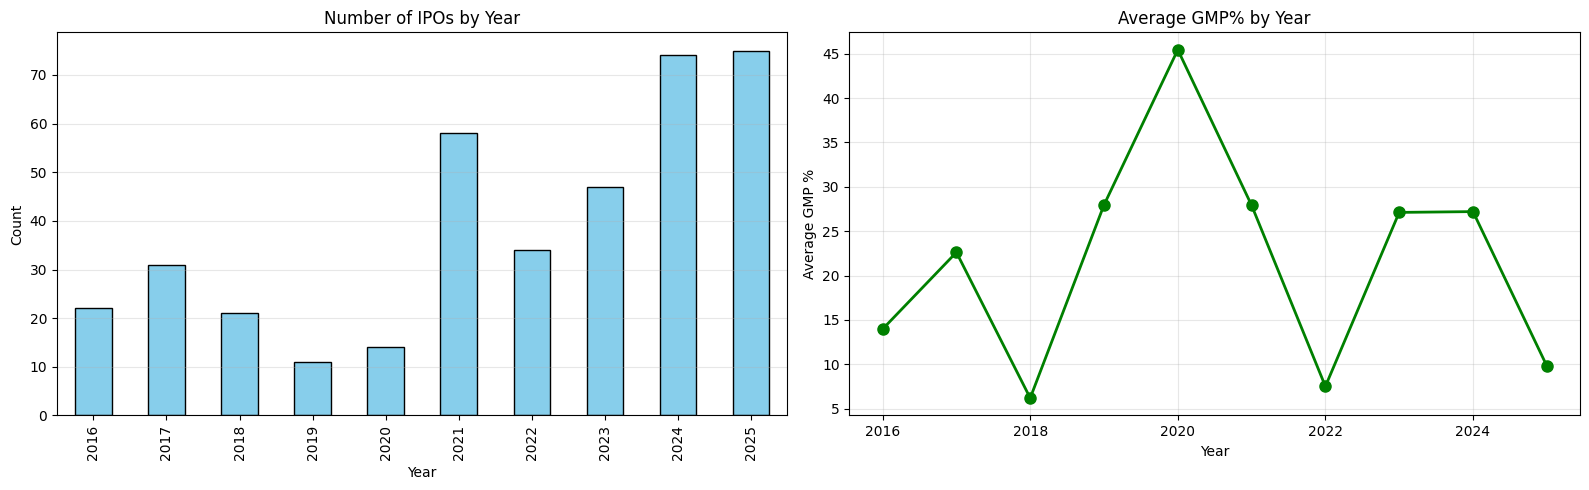


2.2 — Quarterly Statistics:
              count       mean
Year Quarter                  
2016 1            6  -3.545000
     2            4  33.980000
     3            8  12.328750
     4            4  23.482500
2017 1            3  61.576667
     2            7  21.705714
     3           10  16.063000
     4           11  18.533636
2018 1           12   6.120833
     2            4   7.532500
     3            5   5.288000
2019 1            3  -0.200000
     2            3  21.530000
     3            2  72.345000
     4            3  32.950000
2020 1            1  -9.750000
     3            8  45.586250
     4            5  56.266000
2021 1           13  24.479231
     2            6  20.340000
     3           19  34.472632
     4           20  26.191000
2022 1            3   5.486667
     2           10   3.040000
     3            3  43.466667
     4           18   4.339444
2023 1            1   2.580000
     2            6  30.750000
     3           21  26.144762
     4    

In [77]:
print("\n" + "=" * 80)
print("SECTION 2: IPO PERFORMANCE TRENDS OVER TIME")
print("=" * 80)

# Extract time features from ISSUE START DATE for trend analysis (year, quarter, month)
data_set['Year'] = data_set['ISSUE START DATE'].dt.year
data_set['Quarter'] = data_set['ISSUE START DATE'].dt.quarter
data_set['Month'] = data_set['ISSUE START DATE'].dt.month

# Yearly statistics for GMP%
print("\n2.1 — Yearly IPO Statistics:")
yearly_stats = data_set.groupby('Year')['% Gain / loss on Listing'].agg(['count', 'mean', 'median', 'std'])
print(yearly_stats)

# Visualization: Number of IPOs by year and average GMP% by year
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Count of IPOs per year
data_set['Year'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Number of IPOs by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3, axis='y')

# Average GMP% by year
yearly_mean_gmp = data_set.groupby('Year')['% Gain / loss on Listing'].mean()
yearly_mean_gmp.plot(kind='line', ax=axes[1], marker='o', linewidth=2, markersize=8, color='green')
axes[1].set_title('Average GMP% by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average GMP %')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Quarterly statistics grouped by year
print("\n2.2 — Quarterly Statistics:")
quarterly_stats = data_set.groupby(['Year', 'Quarter'])['% Gain / loss on Listing'].agg(['count', 'mean'])
print(quarterly_stats)

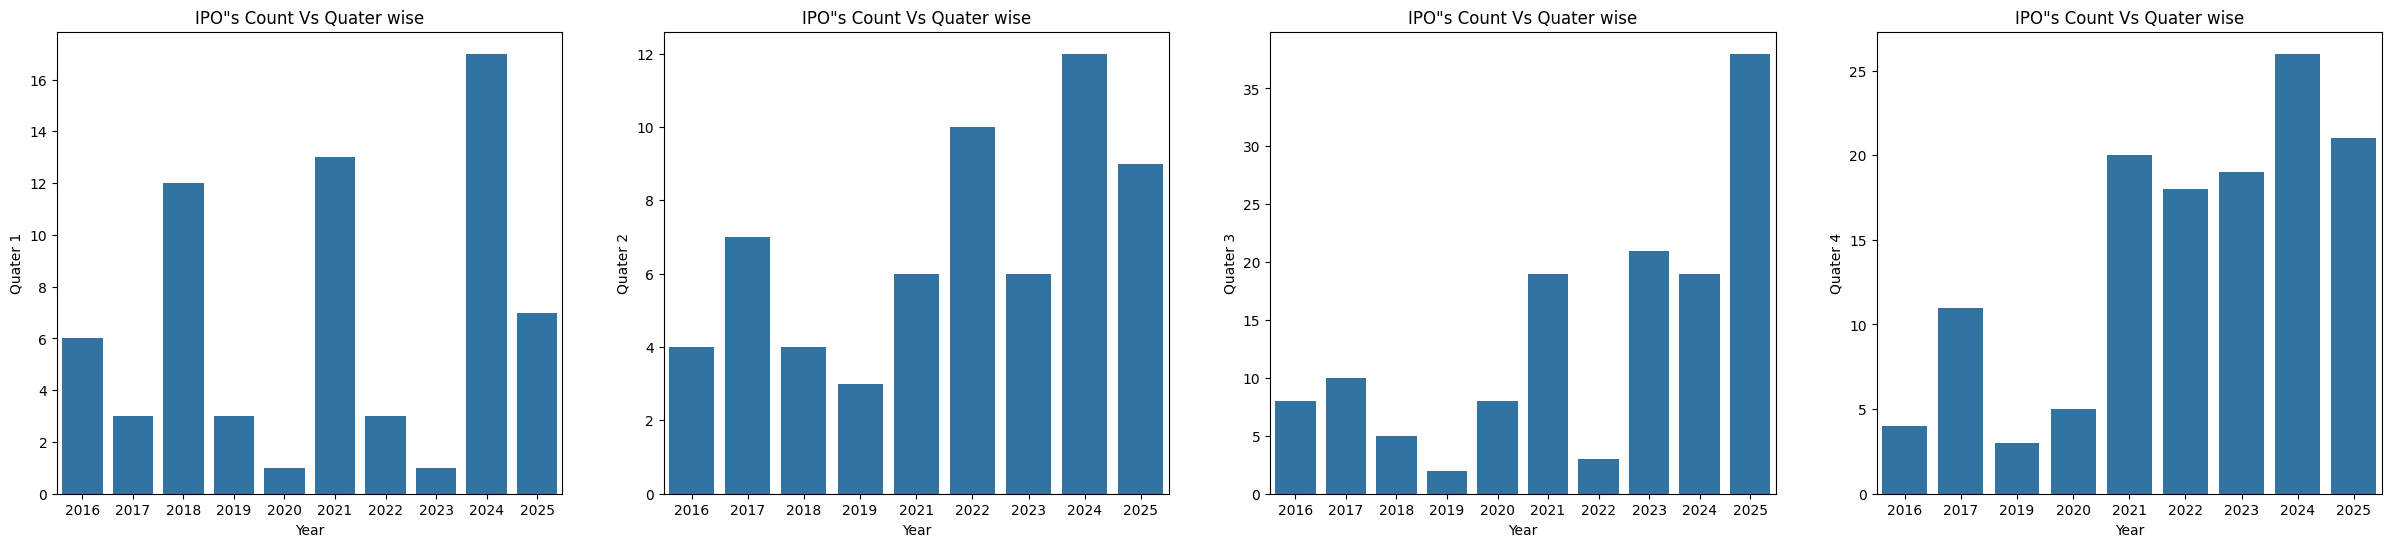

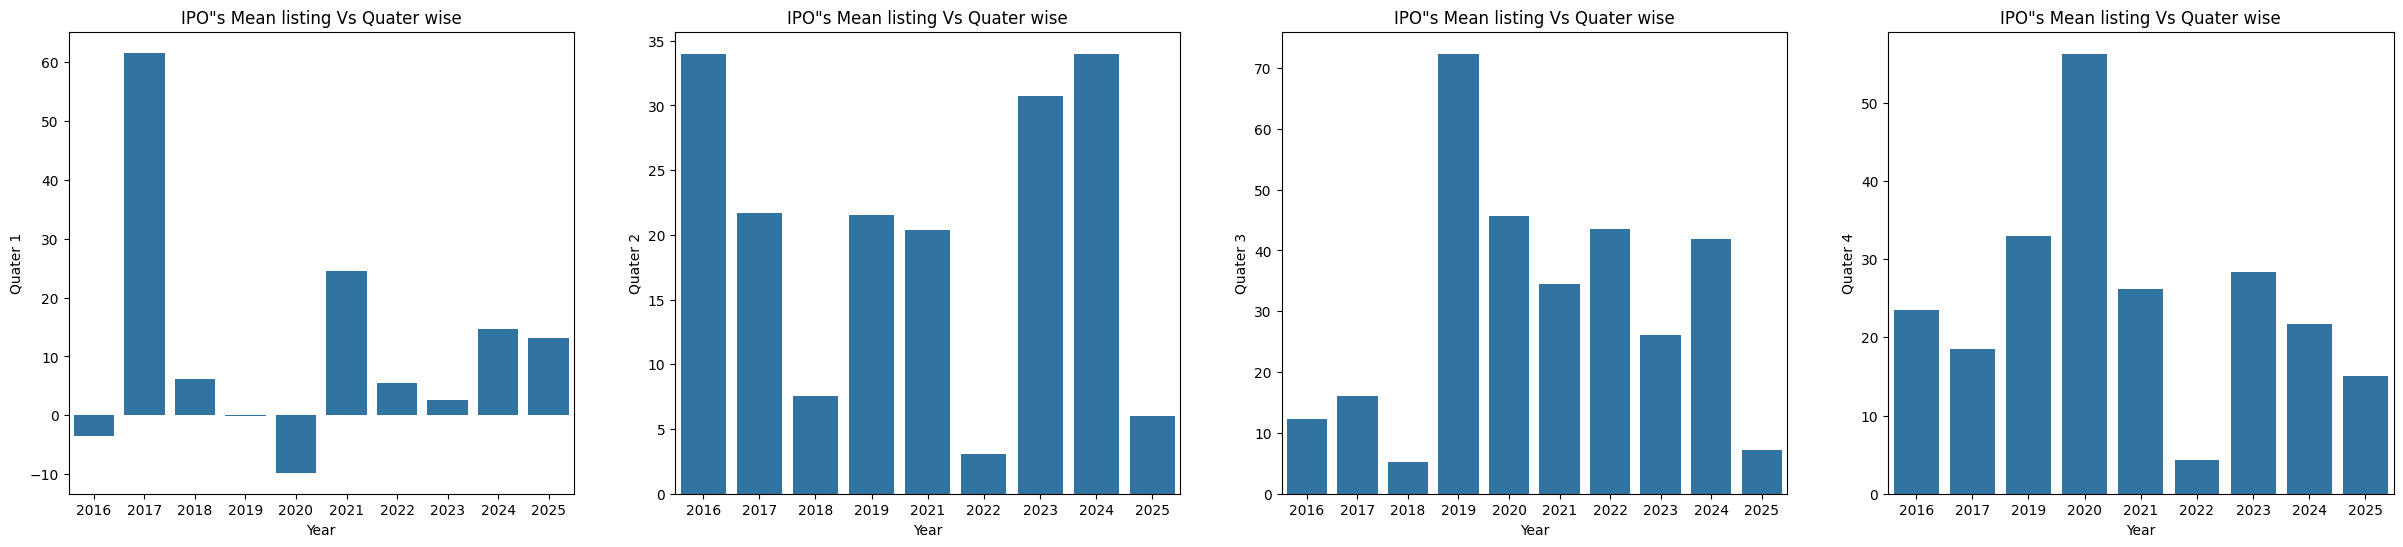

In [78]:
# Plot quarter-wise IPO counts and mean GMP% across years for seasonal trend analysis
qtr_gmp = data_set.groupby(by = ['Quarter','Year'])['% Gain / loss on Listing'].count().reset_index()

plt.figure(figsize=(30,6))
for i in sorted(data_set['Quarter'].unique().tolist()) :
    plt.subplot(1, 4, sorted(data_set['Quarter'].unique().tolist()).index(i) +1)

    sns.barplot(y = qtr_gmp[qtr_gmp['Quarter'] == i ]['% Gain / loss on Listing'].values, x = qtr_gmp[qtr_gmp['Quarter'] == i ]['Year'].values)
    plt.xlabel('Year')
    plt.ylabel(f'Quater {i}')
    plt.title('IPO"s Count Vs Quater wise')

plt.show()


qtr_gmp = data_set.groupby(by = ['Quarter','Year'])['% Gain / loss on Listing'].mean().reset_index()

plt.figure(figsize=(30,6))
for i in sorted(data_set['Quarter'].unique().tolist()) :
    plt.subplot(1, 4, sorted(data_set['Quarter'].unique().tolist()).index(i) +1)

    sns.barplot(y = qtr_gmp[qtr_gmp['Quarter'] == i ]['% Gain / loss on Listing'].values, x = qtr_gmp[qtr_gmp['Quarter'] == i ]['Year'].values)
    plt.xlabel('Year')
    plt.ylabel(f'Quater {i}')
    plt.title('IPO"s Mean listing Vs Quater wise')

plt.show()


SECTION 3: SUBSCRIPTION ANALYSIS (QIB, NII, RII, TOTAL)

3.1 — Subscription Distribution:
              QIB         NII         RII       TOTAL
count  387.000000  387.000000  387.000000  387.000000
mean    27.454806   81.756641   14.887752   30.651654
std     28.901560  132.506045   26.549881   35.969133
min      0.980000    0.030000    0.020000    0.950000
25%      2.680000    2.215000    1.840000    2.395000
50%     15.980000   24.600000    5.980000   16.530000
75%     47.530000   94.295000   15.565000   49.690000
max    133.730000  875.550000  256.630000  240.580000

3.2 — Correlation with GMP% (CRITICAL):
TOTAL    0.695797
QIB      0.638219
NII      0.581424
RII      0.508929
dtype: float64


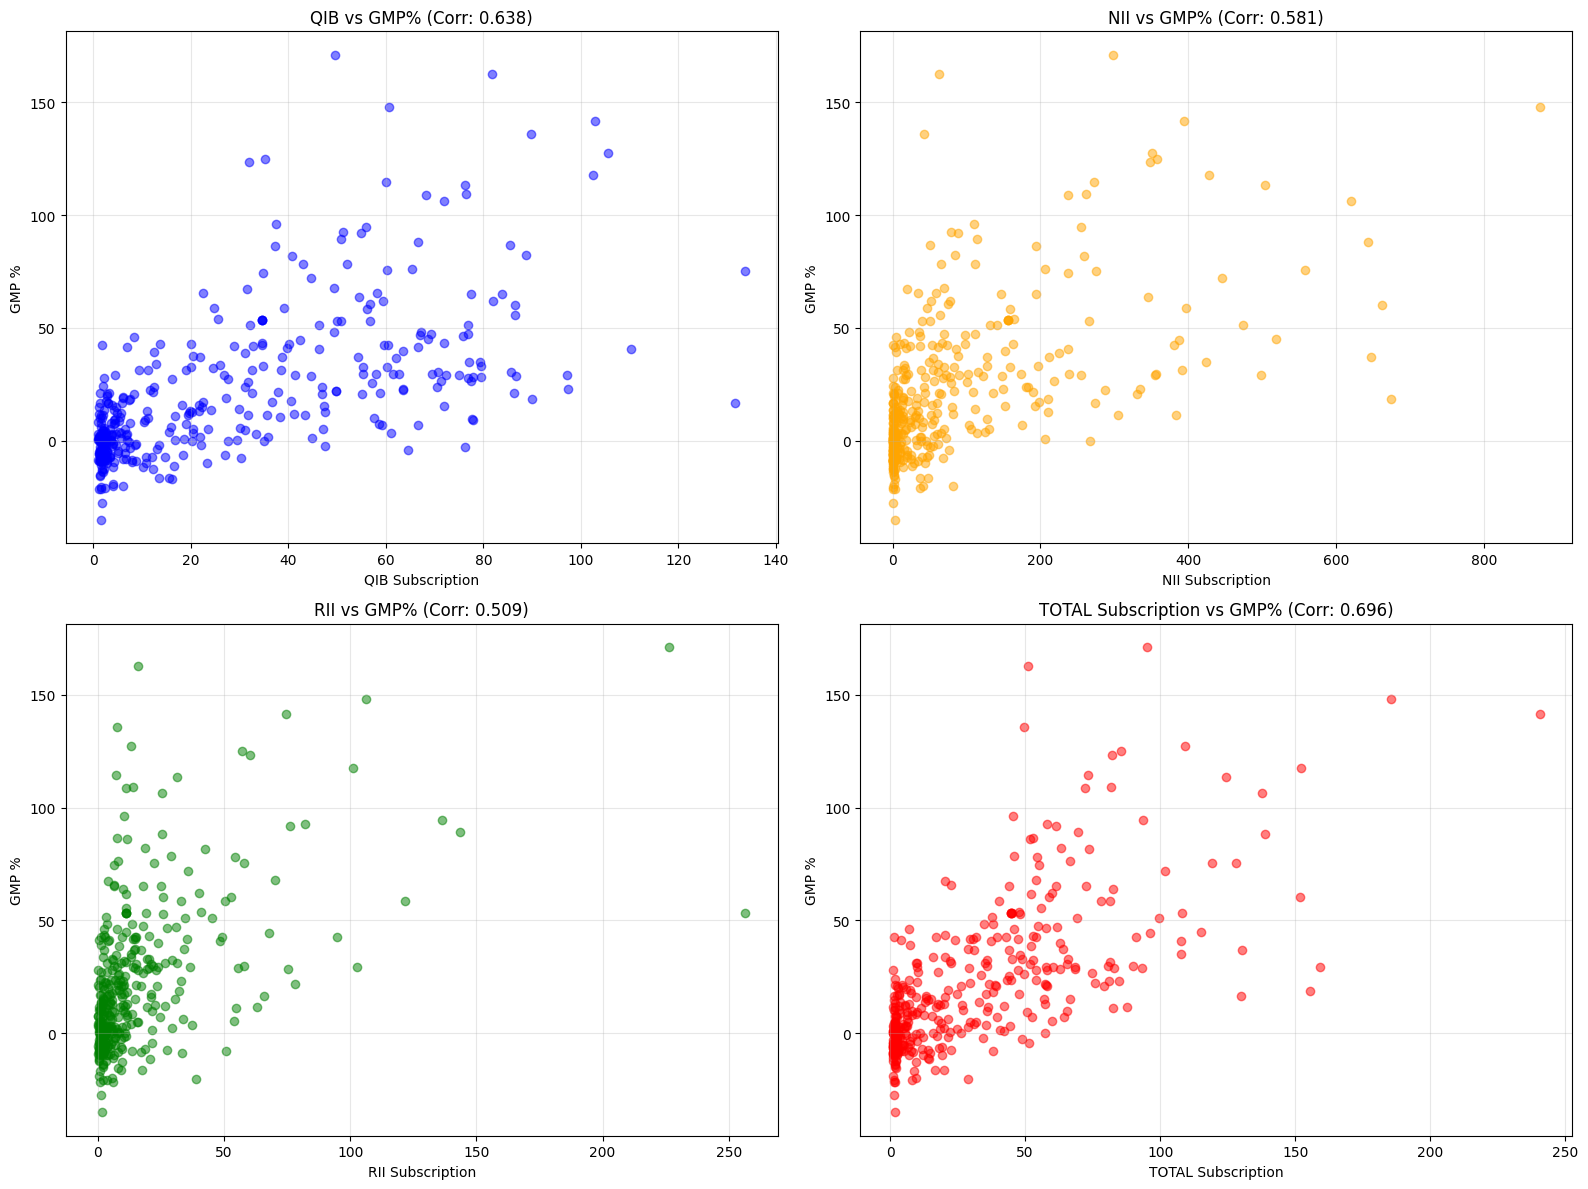


3.3 — GMP% by Subscription Level:
           count       mean  median        std
Sub_Level                                     
Low          129  -0.471318   -1.00  11.478541
Medium       129  12.053876    9.96  18.317922
High         129  50.285659   42.42  36.653584


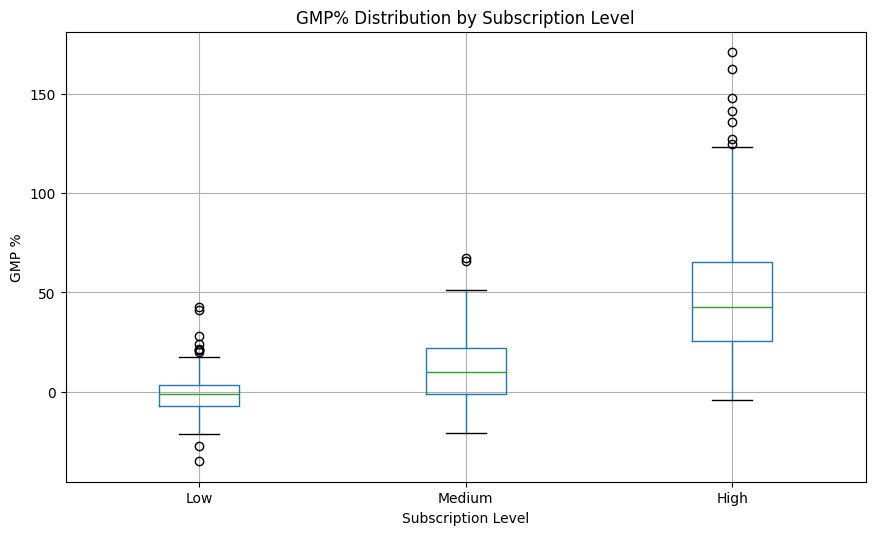

In [79]:
print("\n" + "=" * 80)
print("SECTION 3: SUBSCRIPTION ANALYSIS (QIB, NII, RII, TOTAL)")
print("=" * 80)

# Show distribution stats for the subscription-related columns
print("\n3.1 — Subscription Distribution:")
print(data_set[['QIB', 'NII', 'RII', 'TOTAL']].describe())

# Compute correlation between subscription metrics and GMP%
print("\n3.2 — Correlation with GMP% (CRITICAL):")
sub_corr = data_set[['QIB', 'NII', 'RII', 'TOTAL']].corrwith(data_set['% Gain / loss on Listing'])
print(sub_corr.sort_values(ascending=False))

# Scatter plots to visually inspect relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].scatter(data_set['QIB'], data_set['% Gain / loss on Listing'], alpha=0.5, color='blue')
axes[0, 0].set_xlabel('QIB Subscription')
axes[0, 0].set_ylabel('GMP %')
axes[0, 0].set_title(f'QIB vs GMP% (Corr: {sub_corr["QIB"]:.3f})')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(data_set['NII'], data_set['% Gain / loss on Listing'], alpha=0.5, color='orange')
axes[0, 1].set_xlabel('NII Subscription')
axes[0, 1].set_ylabel('GMP %')
axes[0, 1].set_title(f'NII vs GMP% (Corr: {sub_corr["NII"]:.3f})')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(data_set['RII'], data_set['% Gain / loss on Listing'], alpha=0.5, color='green')
axes[1, 0].set_xlabel('RII Subscription')
axes[1, 0].set_ylabel('GMP %')
axes[1, 0].set_title(f'RII vs GMP% (Corr: {sub_corr["RII"]:.3f})')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(data_set['TOTAL'], data_set['% Gain / loss on Listing'], alpha=0.5, color='red')
axes[1, 1].set_xlabel('TOTAL Subscription')
axes[1, 1].set_ylabel('GMP %')
axes[1, 1].set_title(f'TOTAL Subscription vs GMP% (Corr: {sub_corr["TOTAL"]:.3f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create quantile-based categories for TOTAL subscription (Low/Medium/High)
print("\n3.3 — GMP% by Subscription Level:")
data_set['Sub_Level'] = pd.qcut(data_set['TOTAL'], q=3, labels=['Low', 'Medium', 'High'])
sub_level_stats = data_set.groupby('Sub_Level')['% Gain / loss on Listing'].agg(['count', 'mean', 'median', 'std'])
print(sub_level_stats)

# Box plot to compare GMP% distributions across subscription levels
fig, ax = plt.subplots(figsize=(10, 6))
data_set.boxplot(column='% Gain / loss on Listing', by='Sub_Level', ax=ax)
ax.set_title('GMP% Distribution by Subscription Level')
ax.set_xlabel('Subscription Level')
ax.set_ylabel('GMP %')
plt.suptitle('')  # Remove automatic title
plt.show()


SECTION 4: IPO SIZE ANALYSIS

4.1 — Issue Amount Statistics:
count      387.000000
mean      1608.599587
std       2644.309560
min         69.830000
25%        500.000000
50%        779.580000
75%       1527.125000
max      27858.750000
Name: Issue Amount (Rs.cr.), dtype: float64

Correlation (Issue Amount vs GMP%): -0.055

4.2 — GMP% by IPO Size:
                     count       mean  median        std
Size_Bucket                                             
Small (<500Cr)         373  21.043914  11.530  32.850870
Medium (500-1000Cr)     11  15.813636   7.700  25.492333
Large (1000-2000Cr)      2 -17.585000 -17.585  13.880506
Mega (>2000Cr)           1  -7.160000  -7.160        NaN


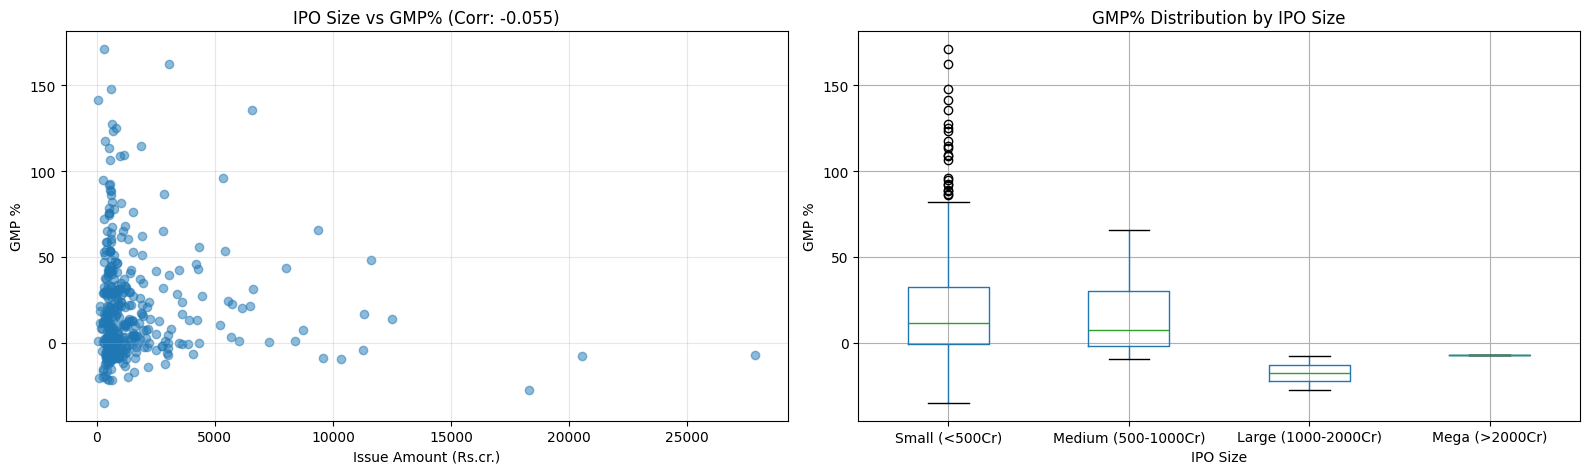

In [80]:
print("\n" + "=" * 80)
print("SECTION 4: IPO SIZE ANALYSIS")
print("=" * 80)

# Basic statistics for 'Issue Amount (Rs.cr.)' and its correlation with GMP%
print("\n4.1 — Issue Amount Statistics:")
print(data_set['Issue Amount (Rs.cr.)'].describe())

size_gmp_corr = data_set['Issue Amount (Rs.cr.)'].corr(data_set['% Gain / loss on Listing'])
print(f"\nCorrelation (Issue Amount vs GMP%): {size_gmp_corr:.3f}")

# Create size buckets to study GMP% by IPO size band
data_set['Size_Bucket'] = pd.cut(data_set['Issue Amount (Rs.cr.)'], 
                            bins=4, 
                            labels=['Small (<500Cr)', 'Medium (500-1000Cr)', 
                                    'Large (1000-2000Cr)', 'Mega (>2000Cr)'])

print("\n4.2 — GMP% by IPO Size:")
size_stats = data_set.groupby('Size_Bucket', observed=True)['% Gain / loss on Listing'].agg(['count', 'mean', 'median', 'std'])
print(size_stats)

# Visual inspection: scatter and boxplot by size bucket
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].scatter(data_set['Issue Amount (Rs.cr.)'], data_set['% Gain / loss on Listing'], alpha=0.5)
axes[0].set_xlabel('Issue Amount (Rs.cr.)')
axes[0].set_ylabel('GMP %')
axes[0].set_title(f'IPO Size vs GMP% (Corr: {size_gmp_corr:.3f})')
axes[0].grid(True, alpha=0.3)

# Box plot grouped by size bucket for distribution comparison
data_set.boxplot(column='% Gain / loss on Listing', by='Size_Bucket', ax=axes[1], figsize=(12, 5))
axes[1].set_title('GMP% Distribution by IPO Size')
axes[1].set_xlabel('IPO Size')
axes[1].set_ylabel('GMP %')
plt.suptitle('')
plt.tight_layout()
plt.show()


SECTION 5: PRICE BAND ANALYSIS

5.1 — Price Band Statistics:
Upper Limit - Mean: 454.41, Median: 369.00
Lower Limit - Mean: 438.32, Median: 355.00
Price Range - Mean: 16.09, Median: 12.00

5.2 — Correlation with GMP%:
Upper Limit vs GMP%: -0.028
Lower Limit vs GMP%: -0.024
Price Range vs GMP%: -0.098


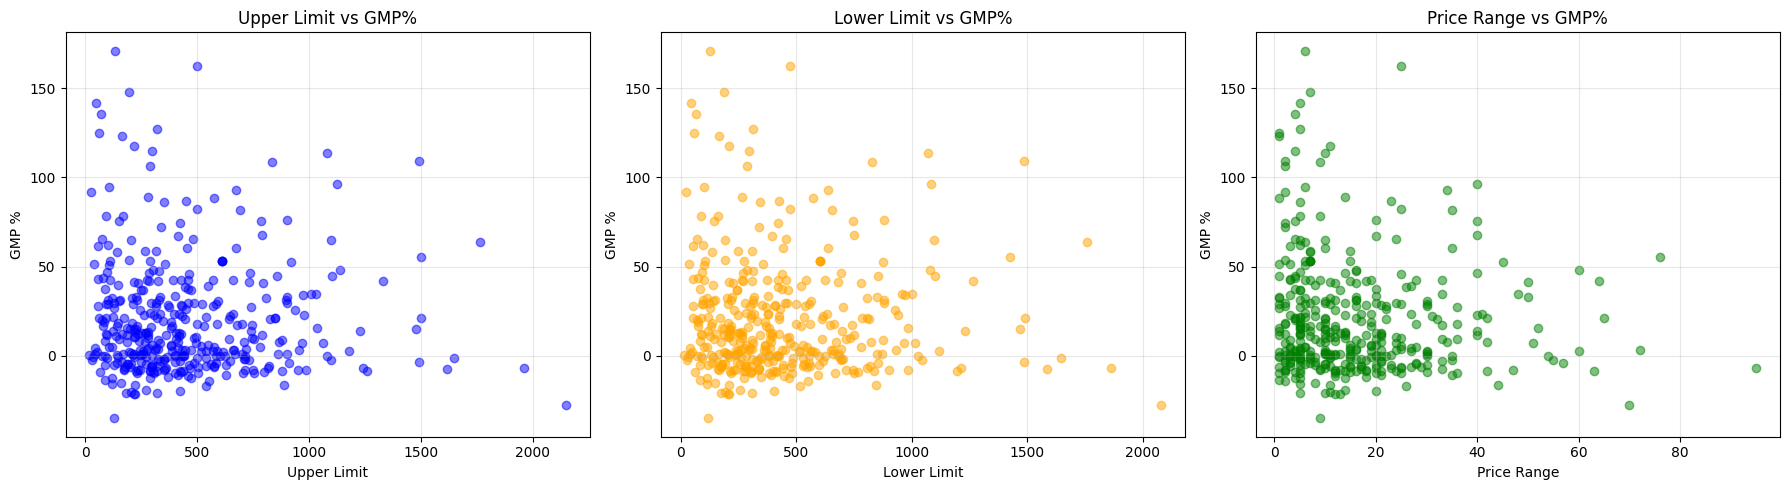

In [ ]:
print("\n" + "=" * 80)
print("SECTION 5: PRICE BAND ANALYSIS")
print("=" * 80)

# Summarize price band (upper/lower) and range statistics
print("\n5.1 — Price Band Statistics:")
print(f"Upper Limit - Mean: {data_set['Issue_price_Upper_Limit'].mean():.2f}, Median: {data_set['Issue_price_Upper_Limit'].median():.2f}")
print(f"Lower Limit - Mean: {data_set['Issue_price_Lower_Limit'].mean():.2f}, Median: {data_set['Issue_price_Lower_Limit'].median():.2f}")
print(f"Price Range - Mean: {data_set['ISSUE_Price_RANGE'].mean():.2f}, Median: {data_set['ISSUE_Price_RANGE'].median():.2f}")

# Correlation with GMP% to understand price band influence
print("\n5.2 — Correlation with GMP%:")
print(f"Upper Limit vs GMP%: {data_set['Issue_price_Upper_Limit'].corr(data_set['% Gain / loss on Listing']):.3f}")
print(f"Lower Limit vs GMP%: {data_set['Issue_price_Lower_Limit'].corr(data_set['% Gain / loss on Listing']):.3f}")
print(f"Price Range vs GMP%: {data_set['ISSUE_Price_RANGE'].corr(data_set['% Gain / loss on Listing']):.3f}")

# Plots to visualize relationship between price band and GMP%
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(data_set['Issue_price_Upper_Limit'], data_set['% Gain / loss on Listing'], alpha=0.5, color='blue')
axes[0].set_xlabel('Upper Limit')
axes[0].set_ylabel('GMP %')
axes[0].set_title('Upper Limit vs GMP%')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(data_set['Issue_price_Lower_Limit'], data_set['% Gain / loss on Listing'], alpha=0.5, color='orange')
axes[1].set_xlabel('Lower Limit')
axes[1].set_ylabel('GMP %')
axes[1].set_title('Lower Limit vs GMP%')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(data_set['ISSUE_Price_RANGE'], data_set['% Gain / loss on Listing'], alpha=0.5, color='green')
axes[2].set_xlabel('Price Range')
axes[2].set_ylabel('GMP %')
axes[2].set_title('Price Range vs GMP%')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


SECTION 6: MARKET CONTEXT (NIFTY) ANALYSIS

6.1 — Nifty Statistics:
Nifty at Issue Start: 18358.47
Nifty at Listing: 18349.70
Average Nifty Change %: -0.025%

Correlation (Nifty Change % vs GMP%): 0.103

6.2 — GMP% by Market Condition:
                  count       mean  median
Market_Condition                          
Crash                20  15.506500   9.415
Bearish             160  17.754562   7.660
Bullish             195  23.098718  13.640
Strong Bull          12  27.157500  25.255


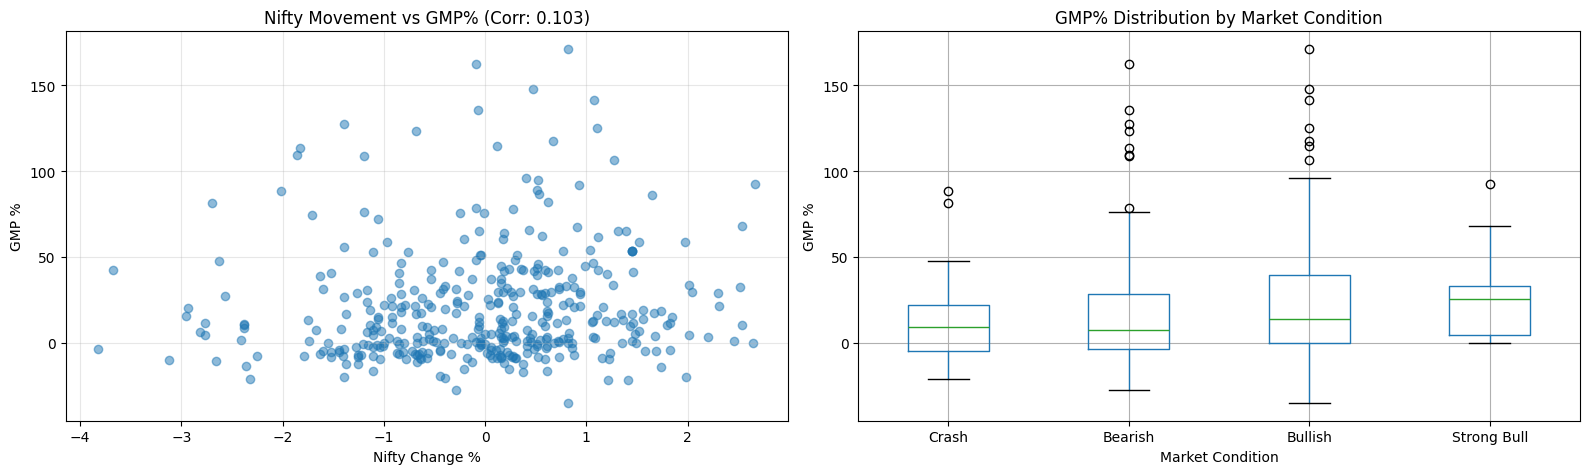

In [82]:
print("\n" + "=" * 80)
print("SECTION 6: MARKET CONTEXT (NIFTY) ANALYSIS")
print("=" * 80)

# Nifty movement calculation
data_set['NIFTY_CHANGE_PCT'] = ((data_set['ISSUE_END_Nifty_CLOSE'] - data_set['ISSUE_START_Nifty_CLOSE']) / 
                           data_set['ISSUE_START_Nifty_CLOSE'] * 100)

print("\n6.1 — Nifty Statistics:")
print(f"Nifty at Issue Start: {data_set['ISSUE_START_Nifty_CLOSE'].mean():.2f}")
print(f"Nifty at Listing: {data_set['ISSUE_END_Nifty_CLOSE'].mean():.2f}")
print(f"Average Nifty Change %: {data_set['NIFTY_CHANGE_PCT'].mean():.3f}%")

# Correlation with GMP%
nifty_gmp_corr = data_set['NIFTY_CHANGE_PCT'].corr(data_set['% Gain / loss on Listing'])
print(f"\nCorrelation (Nifty Change % vs GMP%): {nifty_gmp_corr:.3f}")

# Market condition categories
data_set['Market_Condition'] = pd.cut(data_set['NIFTY_CHANGE_PCT'], 
                                 bins=[-np.inf, -2, 0, 2, np.inf],
                                 labels=['Crash', 'Bearish', 'Bullish', 'Strong Bull'])

print("\n6.2 — GMP% by Market Condition:")
market_stats = data_set.groupby('Market_Condition', observed=True)['% Gain / loss on Listing'].agg(['count', 'mean', 'median'])
print(market_stats)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].scatter(data_set['NIFTY_CHANGE_PCT'], data_set['% Gain / loss on Listing'], alpha=0.5)
axes[0].set_xlabel('Nifty Change %')
axes[0].set_ylabel('GMP %')
axes[0].set_title(f'Nifty Movement vs GMP% (Corr: {nifty_gmp_corr:.3f})')
axes[0].grid(True, alpha=0.3)

data_set.boxplot(column='% Gain / loss on Listing', by='Market_Condition', ax=axes[1])
axes[1].set_title('GMP% Distribution by Market Condition')
axes[1].set_xlabel('Market Condition')
axes[1].set_ylabel('GMP %')
plt.suptitle('')
plt.tight_layout()
plt.show()



SECTION 7: CORRELATION ANALYSIS & FEATURE IMPORTANCE

7.1 — Correlation with GMP% (Sorted):
% Gain / loss on Listing                                  1.000000
% Gain / Loss (Issue price v/s Close price on Listing)    1.000000
TOTAL                                                     0.695797
QIB                                                       0.638219
NII                                                       0.581424
RII                                                       0.508929
ISSUE_END_Nifty_CLOSE                                    -0.018734
ISSUE_END_Nifty_HIGH                                     -0.019539
ISSUE_END_Nifty_LOW                                      -0.019567
ISSUE_END_Nifty_OPEN                                     -0.019989
ISSUE_START_Nifty_LOW                                    -0.022933
ISSUE_START_Nifty_OPEN                                   -0.023201
ISSUE_START_Nifty_CLOSE                                  -0.023346
ISSUE_START_Nifty_HIGH              

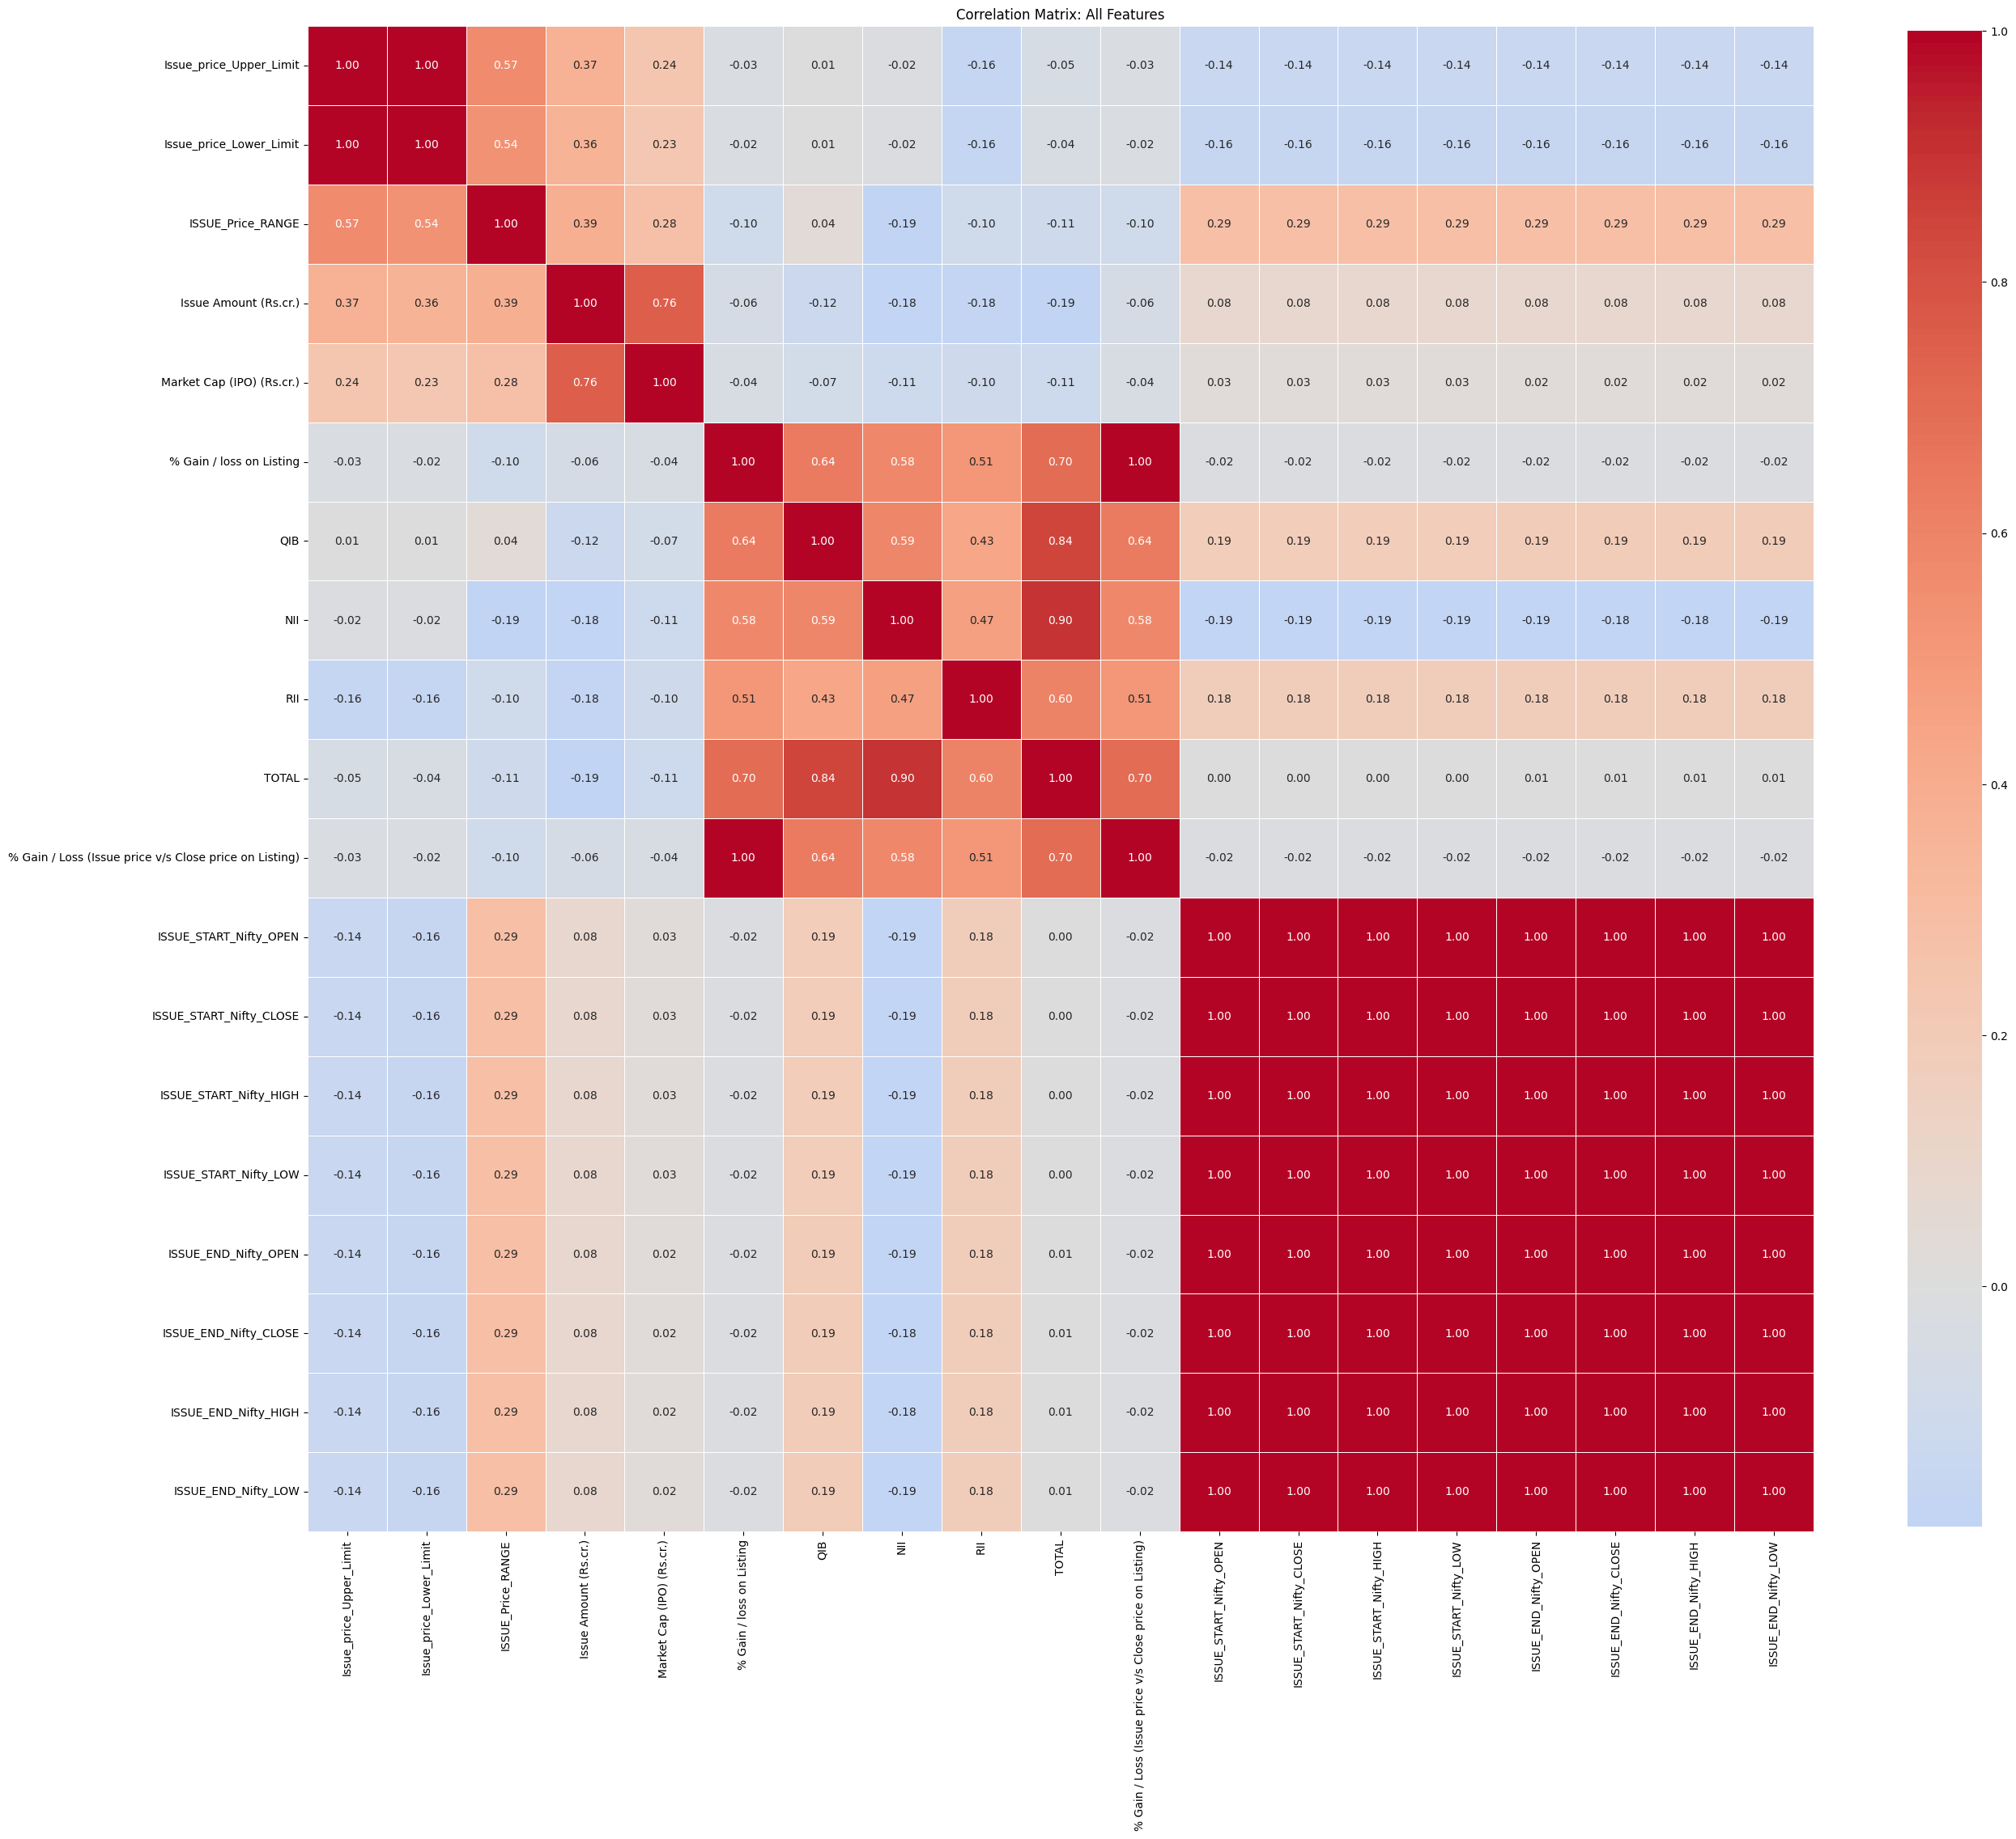

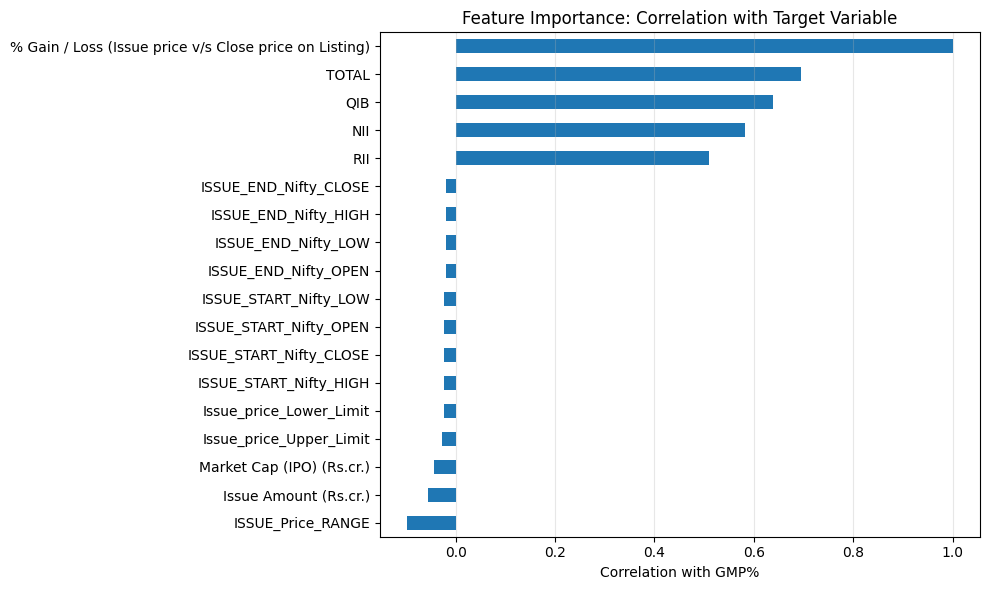


7.2 — Top 5 Strongest Predictors of GMP%:
% Gain / Loss (Issue price v/s Close price on Listing)    1.000000
TOTAL                                                     0.695797
QIB                                                       0.638219
NII                                                       0.581424
RII                                                       0.508929
dtype: float64


In [83]:
print("\n" + "=" * 80)
print("SECTION 7: CORRELATION ANALYSIS & FEATURE IMPORTANCE")
print("=" * 80)

# Select numeric columns for correlation
numeric_cols = data_set.select_dtypes(include=[np.number]).columns.tolist()

# Remove duplicates and derived columns
exclude_cols = ['Year', 'Quarter', 'Month', 'NIFTY_CHANGE_PCT']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Correlation with target
print("\n7.1 — Correlation with GMP% (Sorted):")
corr_with_target = data_set[numeric_cols].corrwith(data_set['% Gain / loss on Listing']).sort_values(ascending=False)
print(corr_with_target)

# Full correlation matrix
corr_matrix = data_set[numeric_cols].corr()

# Visualization: Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: All Features')
#plt.tight_layout()
plt.show()

# Feature importance bar chart (correlation with target)
plt.figure(figsize=(10, 6))
corr_with_target[corr_with_target.index != '% Gain / loss on Listing'].sort_values().plot(kind='barh')
plt.xlabel('Correlation with GMP%')
plt.title('Feature Importance: Correlation with Target Variable')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n7.2 — Top 5 Strongest Predictors of GMP%:")
top_features = corr_with_target[corr_with_target.index != '% Gain / loss on Listing'].abs().nlargest(5)
print(top_features)


In [84]:
print("\n" + "=" * 80)
print("SECTION 8: KEY INSIGHTS & FINDINGS")
print("=" * 80)

print("\n✓ INSIGHT 1: Target Variable Distribution")
print(f"  - Average IPO Listing Gain: {data_set['% Gain / loss on Listing'].mean():.2f}%")
print(f"  - Median: {data_set['% Gain / loss on Listing'].median():.2f}%")
print(f"  - IPOs with losses: {(data_set['% Gain / loss on Listing'] < 0).sum()} out of {len(data_set)}")

print("\n✓ INSIGHT 2: Strongest Predictive Features")
for i, (feature, corr) in enumerate(corr_with_target[1:6].items(), 1):
    print(f"  {i}. {feature}: {corr:.3f}")

print("\n✓ INSIGHT 3: Subscription Impact")
print(f"  - TOTAL Subscription correlation: {sub_corr['TOTAL']:.3f}")
print(f"  - This will be a KEY feature for your K-Means clustering")

print("\n✓ INSIGHT 4: Market Sentiment Impact")
print(f"  - Nifty change correlation: {nifty_gmp_corr:.3f}")
print(f"  - Market conditions DO influence IPO performance")

print("\n✓ INSIGHT 5: IPO Size Impact")
print(f"  - Issue Amount correlation: {size_gmp_corr:.3f}")

print("\n" + "=" * 80)
print("EDA COMPLETE!")
print("=" * 80)



SECTION 8: KEY INSIGHTS & FINDINGS

✓ INSIGHT 1: Target Variable Distribution
  - Average IPO Listing Gain: 20.62%
  - Median: 11.49%
  - IPOs with losses: 108 out of 387

✓ INSIGHT 2: Strongest Predictive Features
  1. % Gain / Loss (Issue price v/s Close price on Listing): 1.000
  2. TOTAL: 0.696
  3. QIB: 0.638
  4. NII: 0.581
  5. RII: 0.509

✓ INSIGHT 3: Subscription Impact
  - TOTAL Subscription correlation: 0.696
  - This will be a KEY feature for your K-Means clustering

✓ INSIGHT 4: Market Sentiment Impact
  - Nifty change correlation: 0.103
  - Market conditions DO influence IPO performance

✓ INSIGHT 5: IPO Size Impact
  - Issue Amount correlation: -0.055

EDA COMPLETE!
